### Importing the packages

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.cluster import KMeans,DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [49]:
### loading the dataset
df = pd.read_csv('data.csv')
df = df[df['IncGeo_BoroughName'] == 'HARROW']
df = df.reset_index()

#### Data Analysis and Preprocessing

In [50]:
print("The dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset contains 7258 rows and 40 columns


In [51]:
# check some basic stats of dataset
df.describe()

,index,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,7258.000000,7258.000000,7258.000000,7.258000e+03,7.258000e+03,3231.000000,3231.000000,7258.000000,7258.000000,3231.000000,3231.000000,7008.000000,2874.000000,7201.000000,7201.000000,7221.000000,7218.000000,7218.000000,7258.000000
mean,212915.778589,2020.536649,13.500000,3.872520e+10,2.133046e+07,515224.011142,189469.463324,515231.978506,189399.751998,51.544385,-0.337729,338.093607,432.995825,1.323150,1.512429,1.578036,1.425187,497.631061,1.341416
std,122114.563946,1.118743,6.110264,6.376859e+10,3.201836e+06,1974.961335,1925.742814,1953.580883,1933.338722,1.571695,0.030510,133.105140,156.928549,0.573855,0.750290,1.287984,4.406215,1562.065326,1.808451
min,8.000000,2019.000000,0.000000,0.000000e+00,1.720809e+07,510681.000000,185167.000000,510650.000000,185150.000000,0.000000,-0.402964,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,333.000000,1.000000
25%,107666.250000,2020.000000,10.000000,0.000000e+00,2.120118e+07,513823.500000,188135.500000,513850.000000,188050.000000,51.580267,-0.358459,257.000000,330.000000,1.000000,1.000000,1.000000,1.000000,339.000000,1.000000
50%,214102.000000,2021.000000,14.000000,0.000000e+00,2.120153e+07,515241.000000,189524.000000,515250.000000,189550.000000,51.592688,-0.338139,319.000000,417.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.000000
75%,316274.250000,2022.000000,18.000000,1.000213e+11,2.120207e+07,516374.000000,190900.000000,516350.000000,190850.000000,51.604784,-0.321156,393.000000,504.000000,2.000000,2.000000,2.000000,1.000000,364.000000,1.000000
max,426453.000000,2022.000000,23.000000,2.000044e+11,9.999001e+07,520094.000000,194810.000000,520050.000000,194850.000000,51.640025,0.000000,1176.000000,1180.000000,7.000000,10.000000,53.000000,223.000000,78496.000000,106.000000


In [52]:
df.median()

index                                2.141020e+05
CalYear                              2.021000e+03
HourOfCall                           1.400000e+01
UPRN                                 0.000000e+00
USRN                                 2.120153e+07
Easting_m                            5.152410e+05
Northing_m                           1.895240e+05
Easting_rounded                      5.152500e+05
Northing_rounded                     1.895500e+05
Latitude                             5.159269e+01
Longitude                           -3.381393e-01
FirstPumpArriving_AttendanceTime     3.190000e+02
SecondPumpArriving_AttendanceTime    4.170000e+02
NumStationsWithPumpsAttending        1.000000e+00
NumPumpsAttending                    1.000000e+00
PumpCount                            1.000000e+00
PumpHoursRoundUp                     1.000000e+00
Notional Cost (£)                    3.520000e+02
NumCalls                             1.000000e+00
dtype: float64

In [53]:
# check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   7258 non-null   int64  
 1   IncidentNumber                          7258 non-null   object 
 2   DateOfCall                              7258 non-null   object 
 3   CalYear                                 7258 non-null   int64  
 4   TimeOfCall                              7258 non-null   object 
 5   HourOfCall                              7258 non-null   int64  
 6   IncidentGroup                           7258 non-null   object 
 7   StopCodeDescription                     7258 non-null   object 
 8   SpecialServiceType                      2357 non-null   object 
 9   PropertyCategory                        7258 non-null   object 
 10  PropertyType                            7258 non-null   obje

In [54]:
# check for missing values
df.isna().mean() *100

index                                      0.000000
IncidentNumber                             0.000000
DateOfCall                                 0.000000
CalYear                                    0.000000
TimeOfCall                                 0.000000
HourOfCall                                 0.000000
IncidentGroup                              0.000000
StopCodeDescription                        0.000000
SpecialServiceType                        67.525489
PropertyCategory                           0.000000
PropertyType                               0.000000
AddressQualifier                           0.000000
Postcode_full                             55.483604
Postcode_district                          0.000000
UPRN                                       0.000000
USRN                                       0.000000
IncGeo_BoroughCode                         0.000000
IncGeo_BoroughName                         0.000000
ProperCase                                 0.000000
IncGeo_WardC

####  Observations:
- The dataset has alot of misisng values

In [55]:
### dropping the columns having missing value >50% or clumns that we arre not going to use in our analysis
df = df.drop(['ProperCase','CalYear','IncGeo_BoroughCode','IncGeo_BoroughName','IncidentNumber','TimeOfCall','HourOfCall','FRS','SpecialServiceType','Postcode_full','Easting_m','Northing_m', 'Latitude','Longitude','SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation'],axis=1)
df

,index,DateOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,UPRN,USRN,...,Northing_rounded,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,8,01 Jan 2019,Fire,Primary Fire,Non Residential,Private Garden Shed,Correct incident location,HA3,0,21201601,...,189150,Stanmore,369.0,Stanmore,2.0,2.0,4.0,4.0,1332.0,5.0
1,11,01 Jan 2019,Fire,Secondary Fire,Outdoor Structure,Small refuse/rubbish container,In street close to gazetteer location,HA1,10010598211,21201353,...,188350,Harrow,608.0,Northolt,1.0,1.0,1.0,1.0,333.0,3.0
2,156,01 Jan 2019,False Alarm,AFA,Dwelling,Self contained Sheltered Housing,Within same building,HA3,0,21201528,...,191950,Harrow,359.0,Harrow,1.0,1.0,1.0,1.0,333.0,1.0
3,239,01 Jan 2019,False Alarm,AFA,Non Residential,Other retail warehouse,Within same building,HA1,10070269938,21201658,...,188950,Harrow,341.0,Harrow,1.0,1.0,1.0,1.0,333.0,1.0
4,302,01 Jan 2019,False Alarm,AFA,Non Residential,Vehicle sales building,Correct incident location,HA1,10070269938,21201658,...,188950,Harrow,1064.0,Stanmore,1.0,1.0,1.0,1.0,333.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,426200,30 Nov 2022,Special Service,Special Service,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,HA3,0,21202436,...,189750,Harrow,412.0,Harrow,1.0,1.0,1.0,1.0,364.0,1.0
7254,426235,30 Nov 2022,False Alarm,False alarm - Malicious,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,HA8,0,21200926,...,192350,Stanmore,431.0,Stanmore,1.0,1.0,1.0,2.0,728.0,1.0
7255,426421,30 Nov 2022,Special Service,Special Service,Dwelling,House - single occupancy,Correct incident location,HA5,0,21201839,...,189250,Harrow,132.0,Harrow,1.0,1.0,1.0,1.0,364.0,1.0
7256,426423,30 Nov 2022,False Alarm,AFA,Other Residential,Nursing/Care Home/Hospice,Within same building,HA7,100023038485,21200986,...,189550,Stanmore,196.0,Stanmore,2.0,2.0,2.0,1.0,364.0,1.0


In [56]:
### check for missing values again
df.isna().mean() *100

index                                    0.000000
DateOfCall                               0.000000
IncidentGroup                            0.000000
StopCodeDescription                      0.000000
PropertyCategory                         0.000000
PropertyType                             0.000000
AddressQualifier                         0.000000
Postcode_district                        0.000000
UPRN                                     0.000000
USRN                                     0.000000
IncGeo_WardCode                          0.000000
IncGeo_WardName                          0.000000
IncGeo_WardNameNew                       0.000000
Easting_rounded                          0.000000
Northing_rounded                         0.000000
IncidentStationGround                    0.000000
FirstPumpArriving_AttendanceTime         3.444475
FirstPumpArriving_DeployedFromStation    3.444475
NumStationsWithPumpsAttending            0.785340
NumPumpsAttending                        0.785340


In [57]:
# changing the featture type to date time
df['DateOfCall']= pd.to_datetime(df['DateOfCall'])

In [58]:
# check for minimum and maximum
print(df['DateOfCall'].min())
print(df['DateOfCall'].max())

2019-01-01 00:00:00
2022-11-30 00:00:00


In [59]:
df = df.drop('DateOfCall',axis=1)

####  Observations:
- The dataset has data from jan 1 2019 to nov 20 2022

In [60]:
#### Sperating the categoric and numeric features
# seperating the categorical featues from numeric features
numeric_cols = df.select_dtypes(['float64','int64']).columns
categoric_cols = df.select_dtypes('object').columns

df_numeric = df[numeric_cols]
df_categoric = df[categoric_cols]

In [61]:
# imputing the missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_numeric)

In [62]:
df_numeric = pd.DataFrame(imputer.transform(df_numeric),columns=df_numeric.columns)

In [63]:
df_categoric = df_categoric.fillna('NA')

#### UNI-VARIATE ANALYSIS

In [64]:
# 
def labeled_barplot(data, feature, perc=False, n=15):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    print(data[feature].value_counts())
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

False Alarm        3563
Special Service    2357
Fire               1338
Name: IncidentGroup, dtype: int64


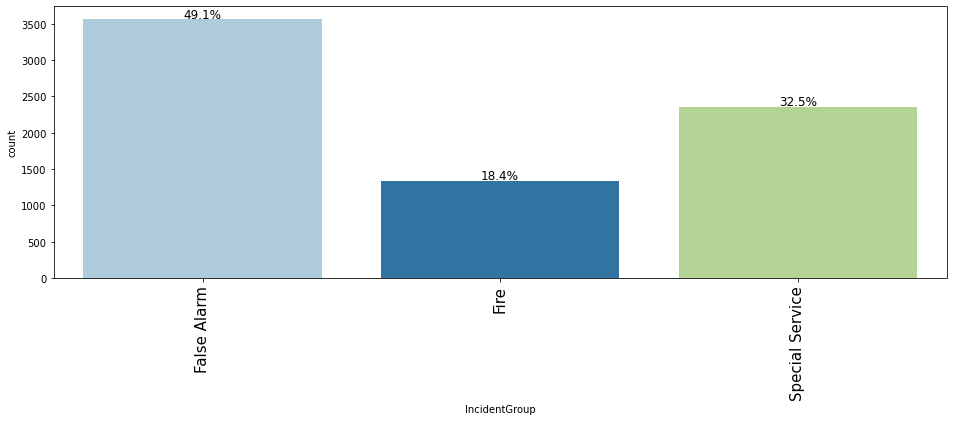

AFA                                      2700
Special Service                          2346
False alarm - Good intent                 807
Secondary Fire                            694
Primary Fire                              641
False alarm - Malicious                    56
Flood call attended - Batch mobilised      11
Chimney Fire                                3
Name: StopCodeDescription, dtype: int64


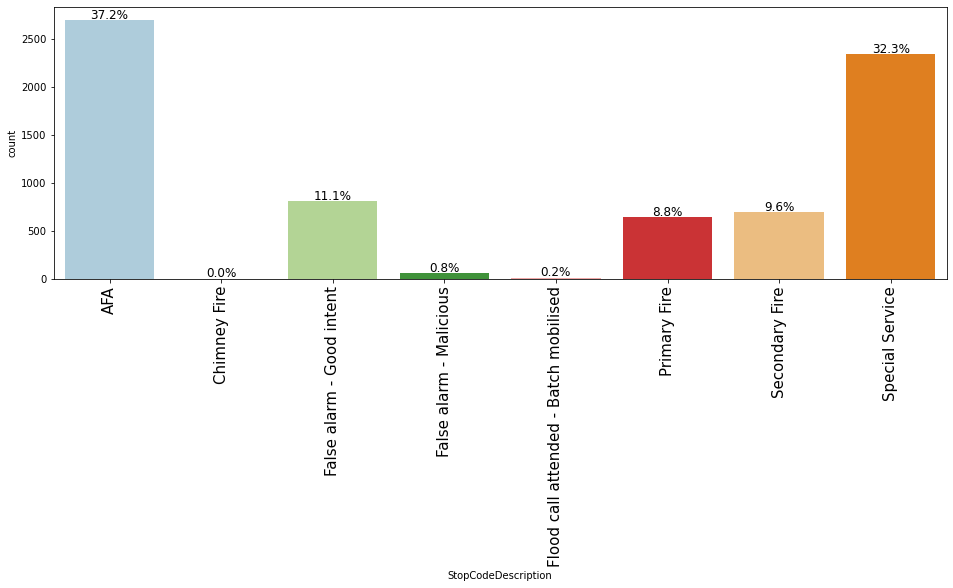

Dwelling             3975
Non Residential      1147
Outdoor               747
Road Vehicle          645
Other Residential     408
Outdoor Structure     327
Rail Vehicle            9
Name: PropertyCategory, dtype: int64


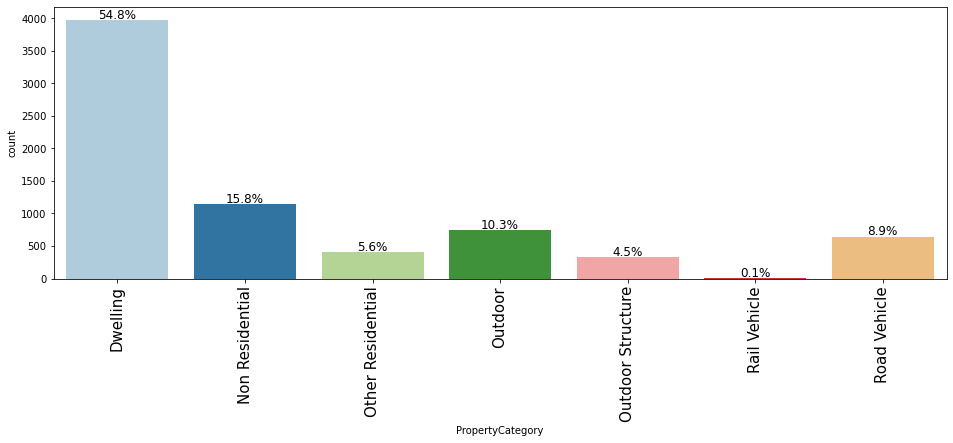

House - single occupancy                              1431
Purpose Built Flats/Maisonettes - Up to 3 storeys      929
Purpose Built Flats/Maisonettes - 4 to 9 storeys       594
Self contained Sheltered Housing                       547
Car                                                    465
                                                      ... 
Intensive Farming Sheds (chickens/ pigs etc)             1
Minibus                                                  1
Laboratory/research Establishment                        1
Motor Home                                               1
Health spa/farm                                          1
Name: PropertyType, Length: 177, dtype: int64


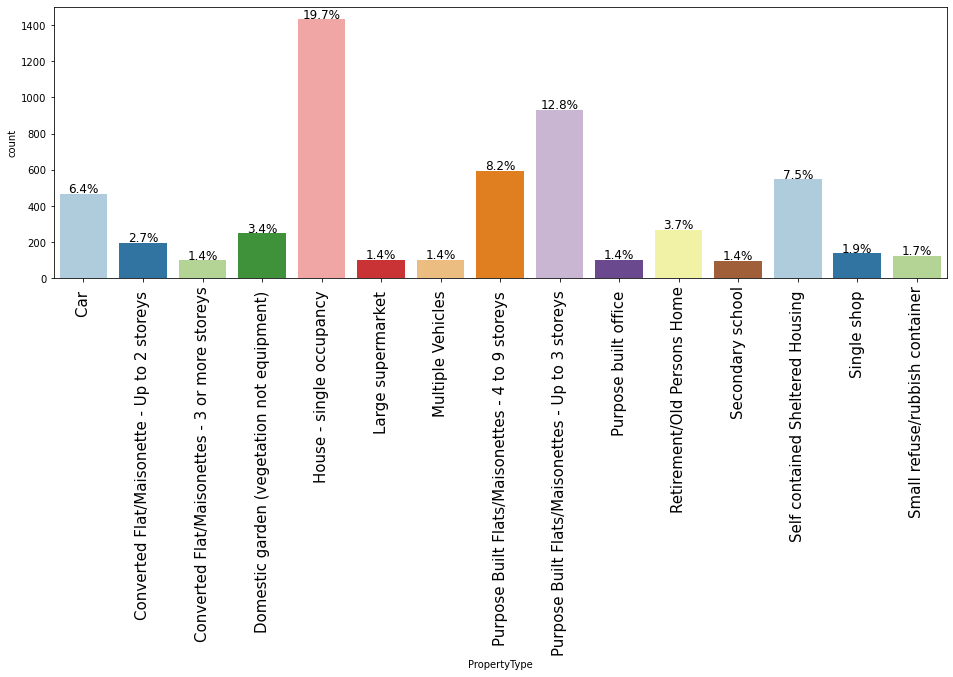

Correct incident location                          4061
Within same building                               1480
On land associated with building                    703
In street outside gazetteer location                617
In street close to gazetteer location               165
Open land/water - nearest gazetteer location        159
In street remote from gazetteer location             17
Nearby address - street not listed in gazetteer      17
Nearby address - no building in street               16
Railway land or rolling stock                        14
On motorway / elevated road                           9
Name: AddressQualifier, dtype: int64


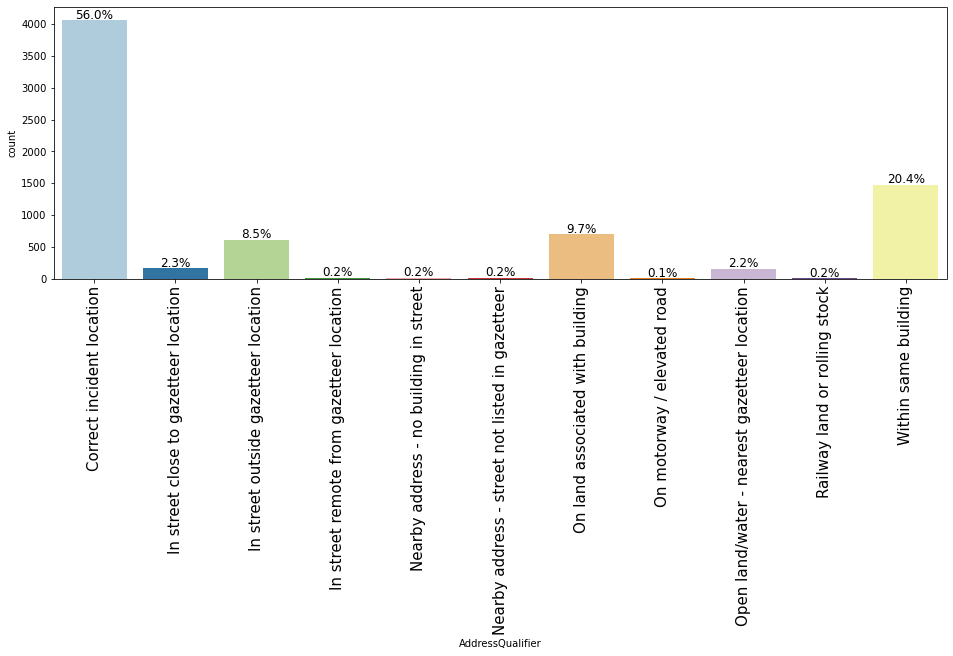

HA3     1669
HA1     1637
HA2     1430
HA7     1047
HA5      855
HA8      556
UB5       35
HA4       14
WD6        6
NW9        5
WD23       4
Name: Postcode_district, dtype: int64


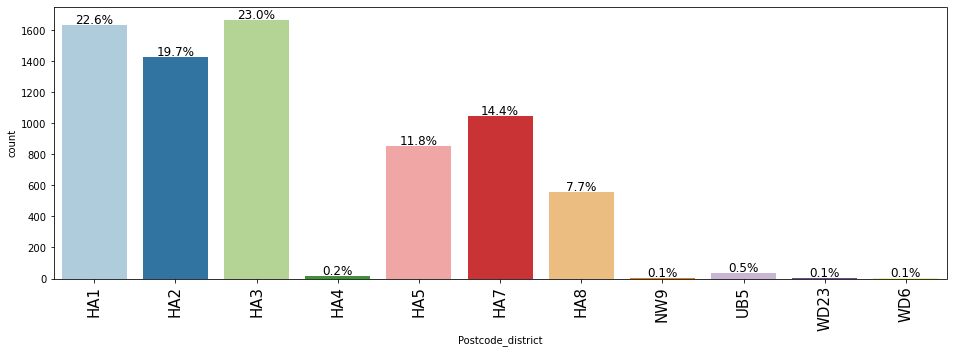

E05013546    802
E05013548    567
E05013560    562
E05013547    447
E05013559    390
E05013545    370
E05013555    355
E05013556    335
E05013550    315
E05013558    315
E05013561    302
E05013553    295
E05013551    290
E05013562    263
E05013543    251
E05013549    246
E05013544    227
E05013563    215
E05013542    206
E05013554    203
E05013552    170
E05013557    126
E05013637      4
E05013630      1
E05013508      1
Name: IncGeo_WardCode, dtype: int64


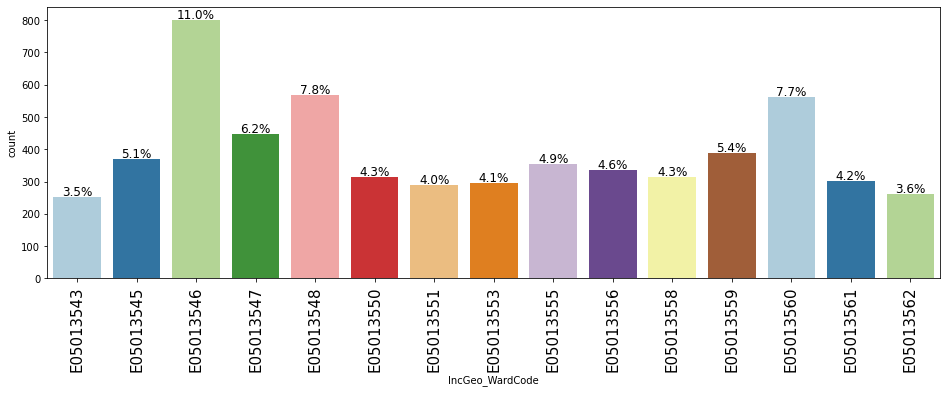

Greenhill             671
Harrow Weald          493
Stanmore              465
Harrow on the Hill    376
Edgware               329
Roxeth                322
Pinner                308
Pinner South          291
Roxbourne             279
Headstone             254
Wealdstone North      251
Marlborough           235
Kenton East           234
Wealdstone South      217
Hatch End             207
Canons                200
Centenary             191
West Harrow           174
Belmont               173
North Harrow          164
Kenton West           143
GREENHILL             131
Rayners Lane          112
STANMORE               97
HARROW WEALD           74
HARROW ON THE HILL     71
ROXETH                 68
HEADSTONE              61
MARLBOROUGH            60
KENTON EAST            56
WEALDSTONE NORTH       51
CANONS                 51
PINNER                 47
WEALDSTONE SOUTH       46
EDGWARE                45
PINNER SOUTH           44
WEST HARROW            41
NORTH HARROW           39
HATCH END   

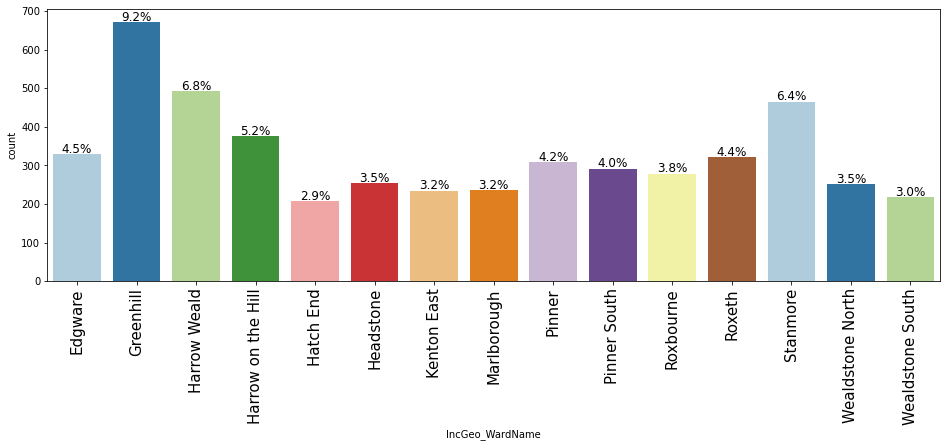

Greenhill             671
Harrow Weald          493
Stanmore              465
Harrow on the Hill    376
Edgware               329
Roxeth                322
Pinner                308
Pinner South          291
Roxbourne             279
Headstone             254
Wealdstone North      251
Marlborough           235
Kenton East           234
Wealdstone South      217
Hatch End             207
Canons                200
Centenary             191
West Harrow           174
Belmont               173
North Harrow          164
Kenton West           143
GREENHILL             131
Rayners Lane          112
STANMORE               97
HARROW WEALD           74
HARROW ON THE HILL     71
ROXETH                 68
HEADSTONE              61
MARLBOROUGH            60
KENTON EAST            56
WEALDSTONE NORTH       51
CANONS                 51
PINNER                 47
WEALDSTONE SOUTH       46
EDGWARE                45
PINNER SOUTH           44
WEST HARROW            41
NORTH HARROW           39
HATCH END   

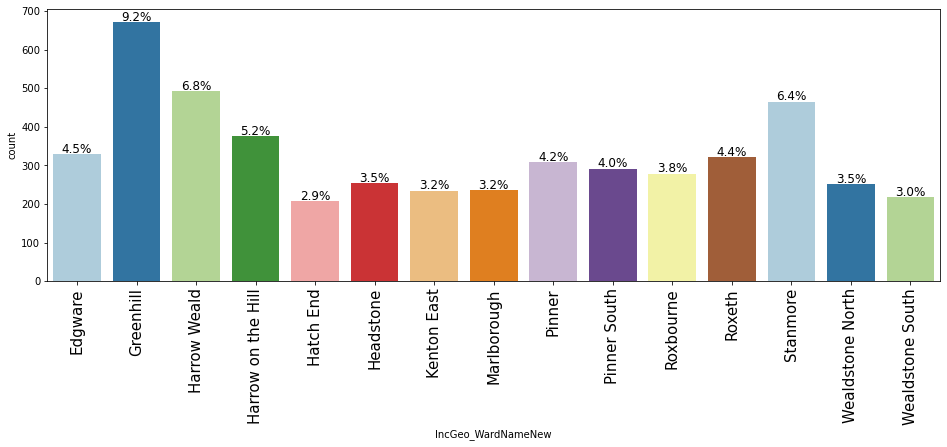

Harrow      3422
Stanmore    2522
Northolt    1312
Wembley        2
Name: IncidentStationGround, dtype: int64


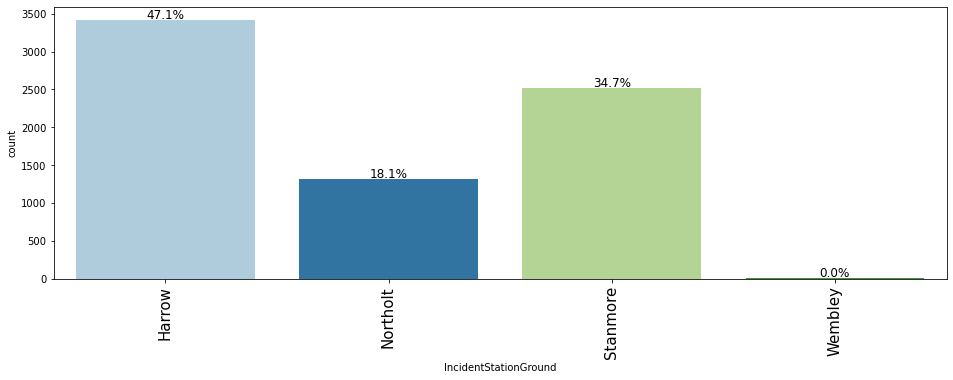

Harrow              2844
Stanmore            2406
Northolt            1374
Wembley              160
Mill Hill             99
Ruislip               74
Hendon                31
Southall              10
Park Royal             2
Barnet                 2
West Hampstead         1
Hayes                  1
Ealing                 1
Hillingdon             1
Willesden              1
North Kensington       1
Name: FirstPumpArriving_DeployedFromStation, dtype: int64


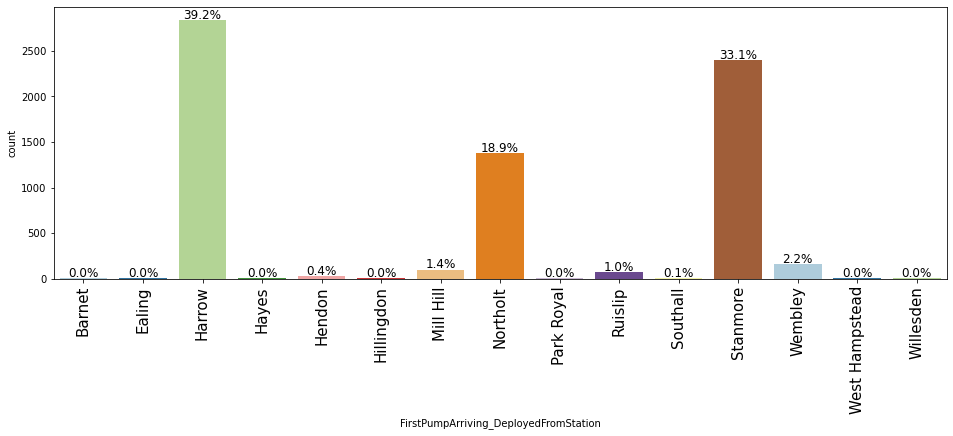

In [65]:
# Analyzing the categoric features
for i in df_categoric.columns:
    labeled_barplot(df, i, perc=True)

Index(['index', 'UPRN', 'USRN', 'Easting_rounded', 'Northing_rounded',
       'FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending',
       'NumPumpsAttending', 'PumpCount', 'PumpHoursRoundUp',
       'Notional Cost (£)', 'NumCalls'],
      dtype='object')


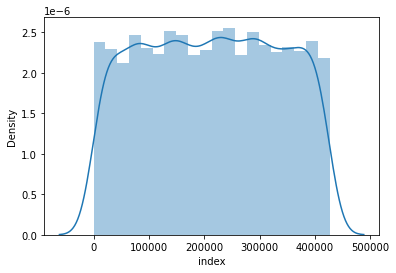

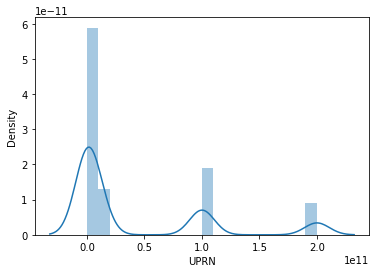

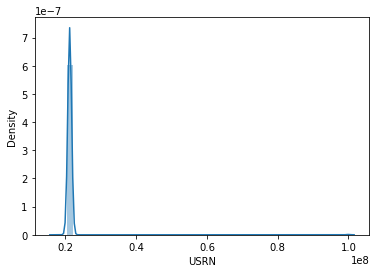

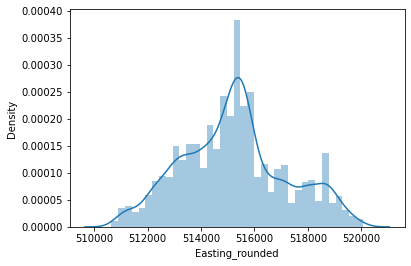

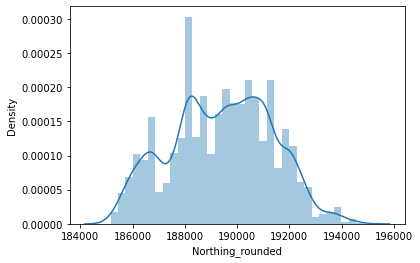

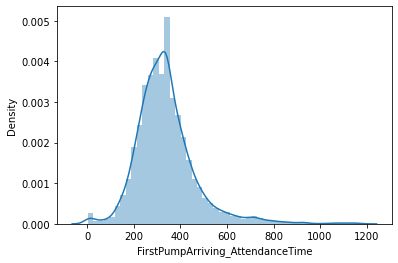

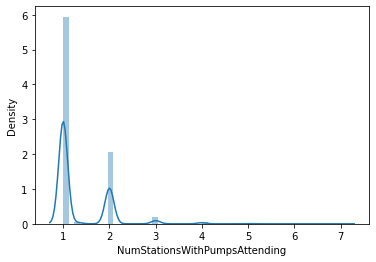

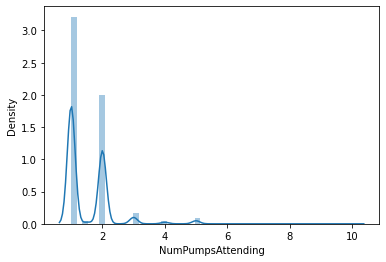

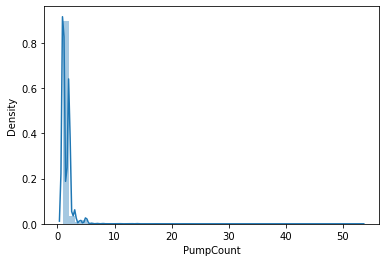

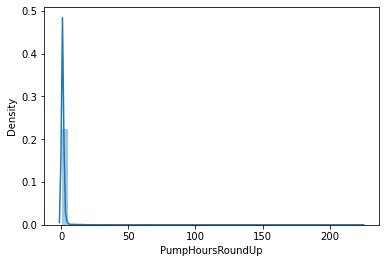

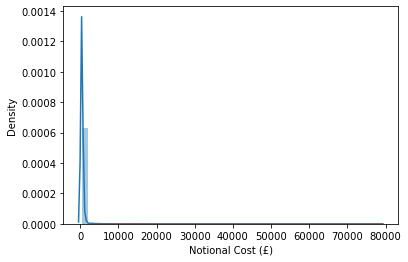

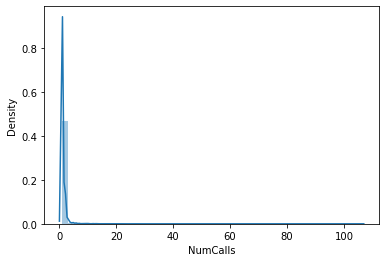

In [66]:
# Analyzing the numeric features
print(df_numeric.columns)
for i in df_numeric.columns:
    plt.figure()
    sns.distplot(df_numeric[i])
    plt.show()

#### Observations:
- We are going to predict the category of incident.

#### Bivariate Analysis

In [67]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

IncidentGroup                          False Alarm  Fire  Special Service  \
StopCodeDescription                                                         
All                                           3563  1338             2357   
Secondary Fire                                   0   694                0   
Primary Fire                                     0   641                0   
Chimney Fire                                     0     3                0   
AFA                                           2700     0                0   
False alarm - Good intent                      807     0                0   
False alarm - Malicious                         56     0                0   
Flood call attended - Batch mobilised            0     0               11   
Special Service                                  0     0             2346   

IncidentGroup                           All  
StopCodeDescription                          
All                                    7258  
Secondary Fire

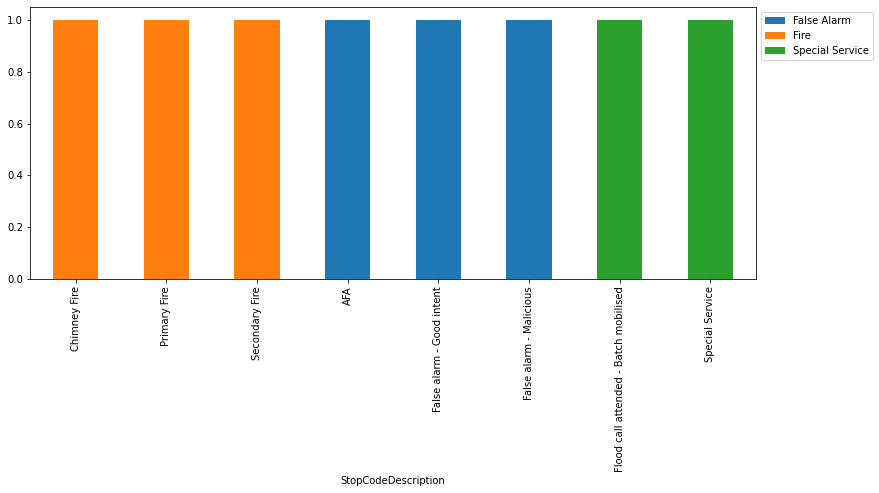

IncidentGroup      False Alarm  Fire  Special Service   All
PropertyCategory                                           
All                       3563  1338             2357  7258
Outdoor                    169   453              125   747
Dwelling                  2061   369             1545  3975
Outdoor Structure           31   272               24   327
Non Residential            887   116              144  1147
Road Vehicle                58   113              474   645
Other Residential          355    15               38   408
Rail Vehicle                 2     0                7     9
------------------------------------------------------------------------------------------------------------------------


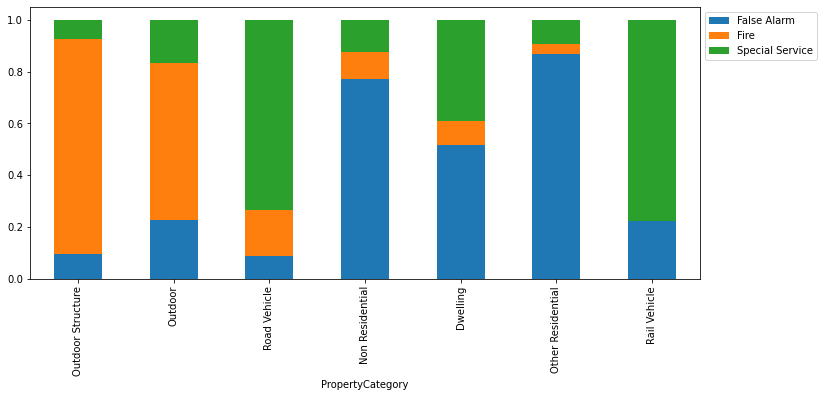

IncidentGroup                                       False Alarm  Fire  \
PropertyType                                                            
All                                                        3563  1338   
House - single occupancy                                    665   196   
Domestic garden (vegetation not equipment)                   74   162   
Small refuse/rubbish container                               16   108   
Purpose Built Flats/Maisonettes - Up to 3 storeys           393    90   
...                                                         ...   ...   
Library                                                      11     0   
Leisure Centre                                                9     0   
Law Courts                                                    1     0   
Lake/pond/reservoir                                           1     0   
Nurses'/Doctors' accommodation                                3     0   

IncidentGroup                                     

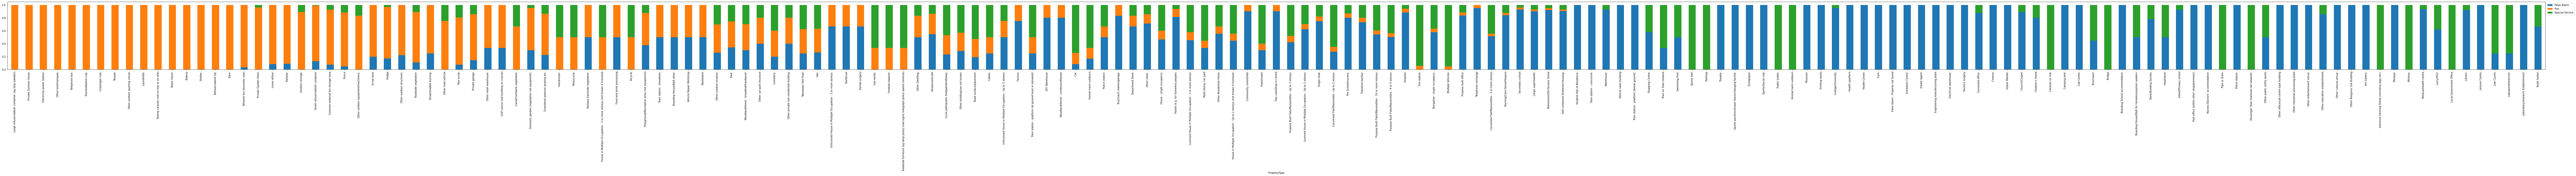

IncidentGroup                                    False Alarm  Fire  \
AddressQualifier                                                     
All                                                     3563  1338   
On land associated with building                         133   474   
Correct incident location                               2340   451   
In street outside gazetteer location                      60   175   
Open land/water - nearest gazetteer location              32   104   
Within same building                                     954    73   
In street close to gazetteer location                     19    40   
In street remote from gazetteer location                   6     6   
Nearby address - no building in street                     4     5   
Nearby address - street not listed in gazetteer            7     5   
On motorway / elevated road                                3     3   
Railway land or rolling stock                              5     2   

IncidentGroup      

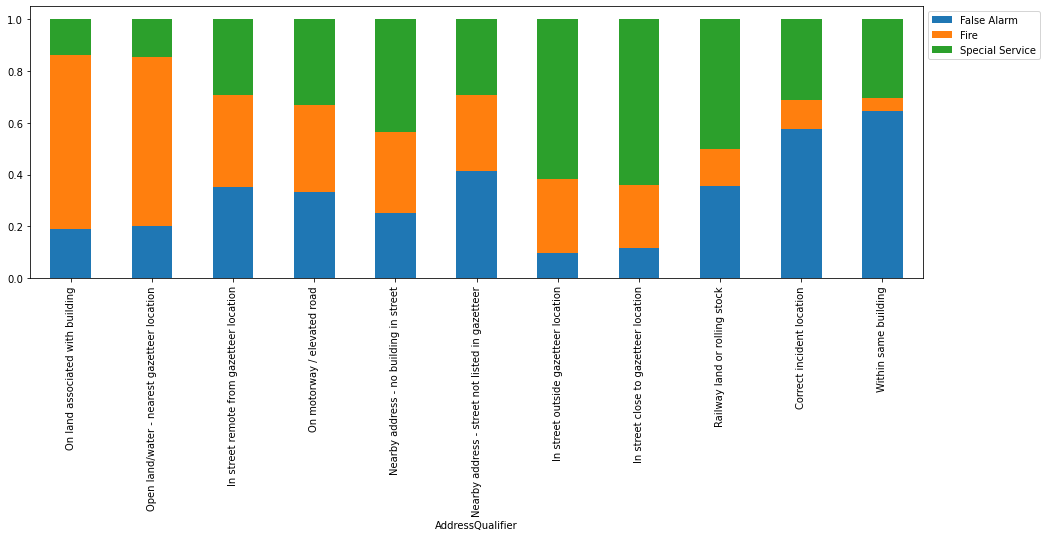

IncidentGroup      False Alarm  Fire  Special Service   All
Postcode_district                                          
All                       3563  1338             2357  7258
HA3                        846   317              506  1669
HA2                        650   314              466  1430
HA1                        834   249              554  1637
HA7                        521   171              355  1047
HA5                        432   152              271   855
HA8                        257   115              184   556
UB5                         16    10                9    35
HA4                          2     5                7    14
WD6                          3     3                0     6
WD23                         1     2                1     4
NW9                          1     0                4     5
------------------------------------------------------------------------------------------------------------------------


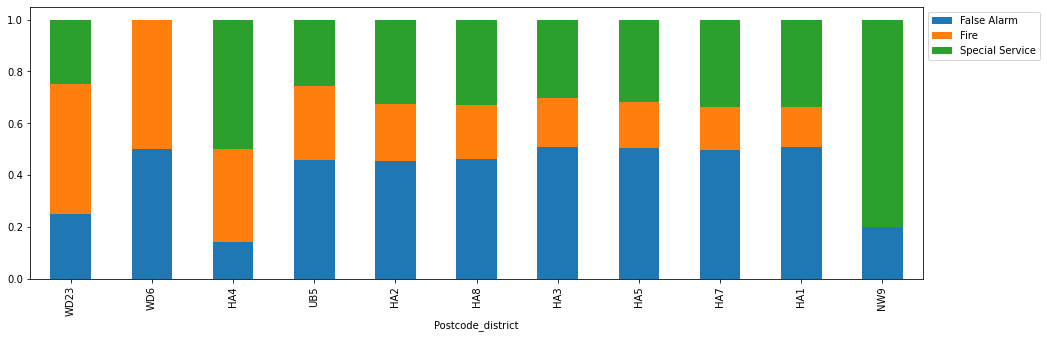

IncidentGroup    False Alarm  Fire  Special Service   All
IncGeo_WardCode                                          
All                     3563  1338             2357  7258
E05013559                169    99              122   390
E05013560                318    96              148   562
E05013546                466    95              241   802
E05013548                337    93              137   567
E05013545                175    78              117   370
E05013555                162    70              123   355
E05013556                167    69               99   335
E05013551                138    66               86   290
E05013547                236    65              146   447
E05013558                157    64               94   315
E05013562                 93    62              108   263
E05013563                 92    59               64   215
E05013550                145    55              115   315
E05013553                108    53              134   295
E05013543     

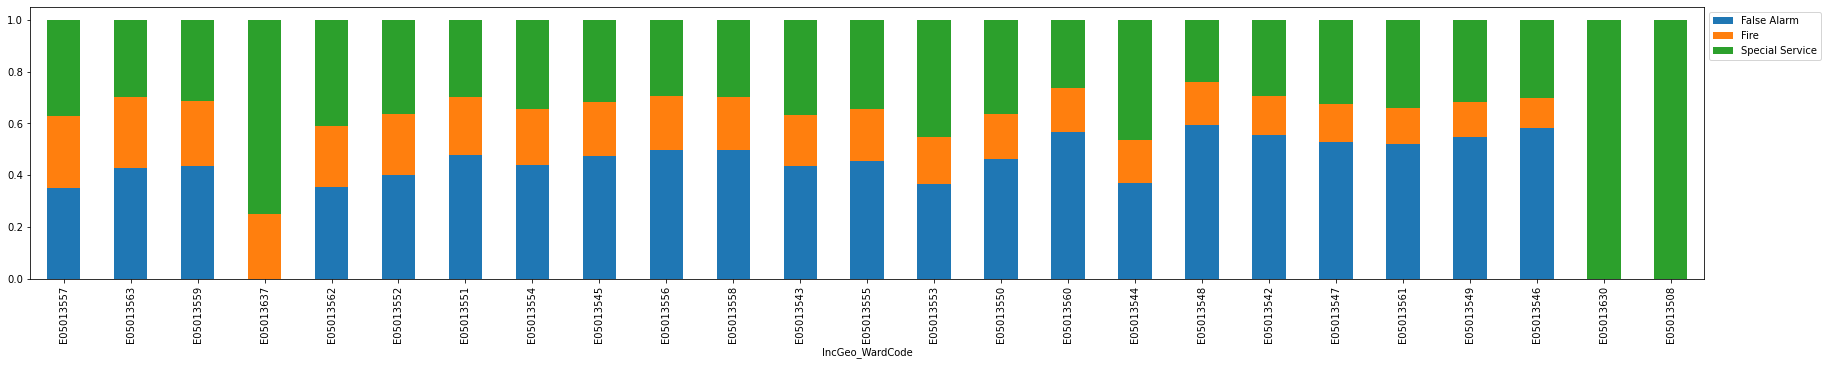

IncidentGroup       False Alarm  Fire  Special Service   All
IncGeo_WardName                                             
All                        3563  1338             2357  7258
Roxeth                      129    88              105   322
Harrow Weald                299    80              114   493
Greenhill                   401    75              195   671
Stanmore                    269    73              123   465
Edgware                     158    69              102   329
Roxbourne                   137    62               80   279
Pinner South                145    60               86   291
Pinner                      142    60              106   308
Kenton East                 113    54               67   234
Harrow on the Hill          201    51              124   376
Wealdstone South             77    48               92   217
West Harrow                  73    46               55   174
Headstone                   123    44               87   254
Canons                  

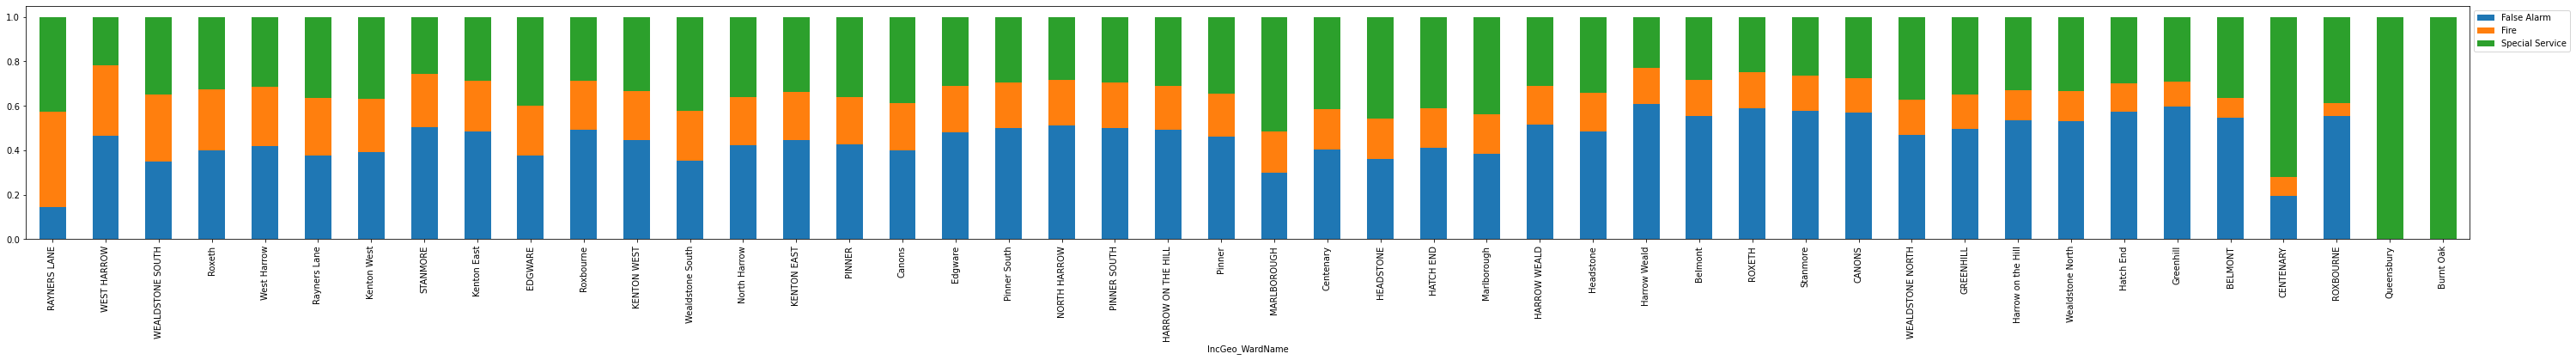

IncidentGroup       False Alarm  Fire  Special Service   All
IncGeo_WardNameNew                                          
All                        3563  1338             2357  7258
Roxeth                      129    88              105   322
Harrow Weald                299    80              114   493
Greenhill                   401    75              195   671
Stanmore                    269    73              123   465
Edgware                     158    69              102   329
Roxbourne                   137    62               80   279
Pinner South                145    60               86   291
Pinner                      142    60              106   308
Kenton East                 113    54               67   234
Harrow on the Hill          201    51              124   376
Wealdstone South             77    48               92   217
West Harrow                  73    46               55   174
Headstone                   123    44               87   254
Canons                  

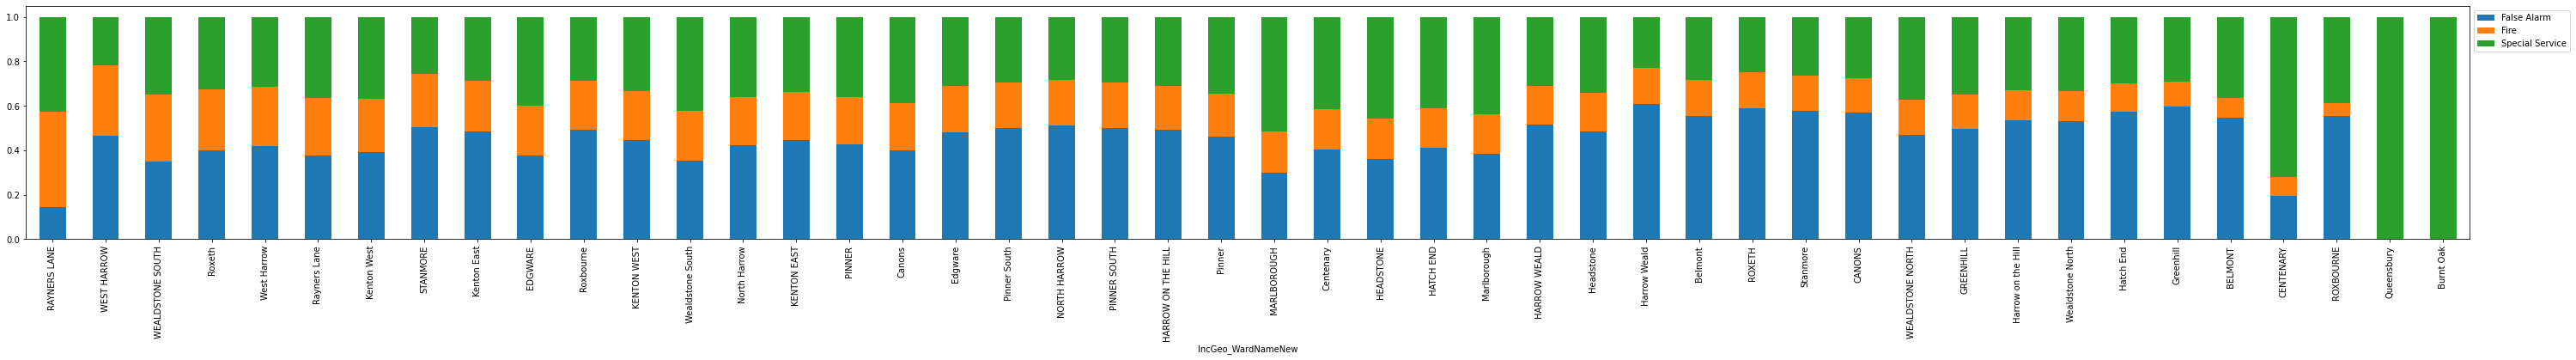

IncidentGroup          False Alarm  Fire  Special Service   All
IncidentStationGround                                          
All                           3563  1338             2357  7258
Harrow                        1754   576             1092  3422
Stanmore                      1196   478              848  2522
Northolt                       612   284              416  1312
Wembley                          1     0                1     2
------------------------------------------------------------------------------------------------------------------------


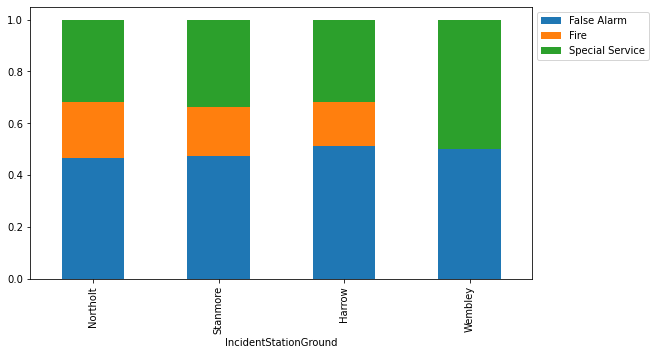

IncidentGroup                          False Alarm  Fire  Special Service  \
FirstPumpArriving_DeployedFromStation                                       
All                                           3537  1330             2141   
Harrow                                        1411   508              925   
Stanmore                                      1229   463              714   
Northolt                                       694   290              390   
Wembley                                         86    28               46   
Mill Hill                                       50    23               26   
Ruislip                                         38    14               22   
Hendon                                          16     3               12   
Southall                                         7     1                2   
Hillingdon                                       0     0                1   
North Kensington                                 1     0                0   

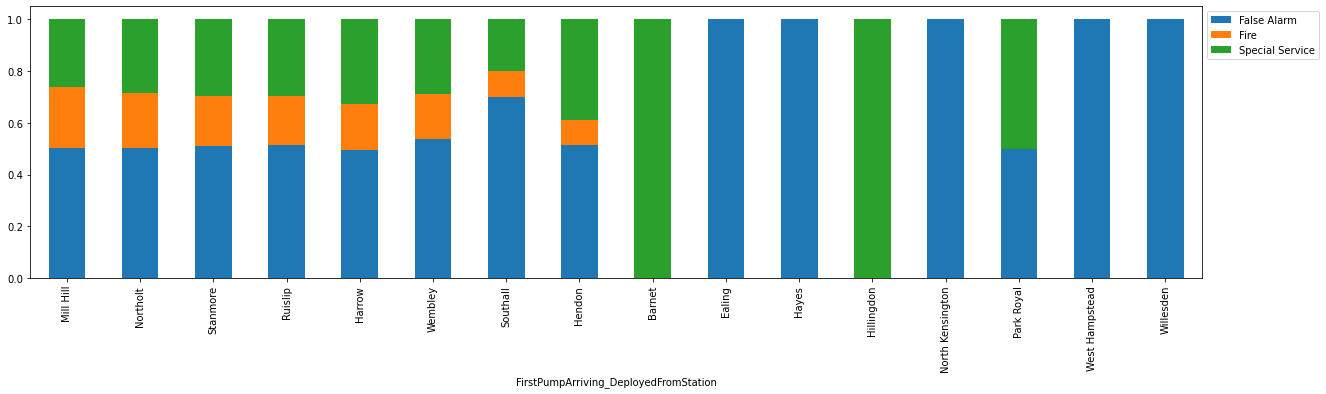

In [68]:
# Analyzing the categoric features
for i in df_categoric.columns[1:]:
    stacked_barplot(df, i, "IncidentGroup")

In [69]:
# concatinating both data frames
df = pd.concat([df_numeric,df_categoric],axis=1)
df = df.drop("index",axis=1)
df

,UPRN,USRN,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),...,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,IncidentStationGround,FirstPumpArriving_DeployedFromStation
0,0.000000e+00,21201601.0,516650.0,189150.0,369.0,2.0,2.0,4.0,4.0,1332.0,...,Primary Fire,Non Residential,Private Garden Shed,Correct incident location,HA3,E05013552,Kenton West,Kenton West,Stanmore,Stanmore
1,1.001060e+10,21201353.0,514350.0,188350.0,608.0,1.0,1.0,1.0,1.0,333.0,...,Secondary Fire,Outdoor Structure,Small refuse/rubbish container,In street close to gazetteer location,HA1,E05013550,Headstone,Headstone,Harrow,Northolt
2,0.000000e+00,21201528.0,514950.0,191950.0,359.0,1.0,1.0,1.0,1.0,333.0,...,AFA,Dwelling,Self contained Sheltered Housing,Within same building,HA3,E05013548,Harrow Weald,Harrow Weald,Harrow,Harrow
3,1.007027e+10,21201658.0,515950.0,188950.0,341.0,1.0,1.0,1.0,1.0,333.0,...,AFA,Non Residential,Other retail warehouse,Within same building,HA1,E05013546,Greenhill,Greenhill,Harrow,Harrow
4,1.007027e+10,21201658.0,515950.0,188950.0,1064.0,1.0,1.0,1.0,1.0,333.0,...,AFA,Non Residential,Vehicle sales building,Correct incident location,HA1,E05013546,Greenhill,Greenhill,Harrow,Stanmore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,0.000000e+00,21202436.0,515450.0,189750.0,412.0,1.0,1.0,1.0,1.0,364.0,...,Special Service,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,HA3,E05013562,WEALDSTONE SOUTH,WEALDSTONE SOUTH,Harrow,Harrow
7254,0.000000e+00,21200926.0,518450.0,192350.0,431.0,1.0,1.0,1.0,2.0,728.0,...,False alarm - Malicious,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,HA8,E05013543,CANONS,CANONS,Stanmore,Stanmore
7255,0.000000e+00,21201839.0,512550.0,189250.0,132.0,1.0,1.0,1.0,1.0,364.0,...,Special Service,Dwelling,House - single occupancy,Correct incident location,HA5,E05013556,PINNER SOUTH,PINNER SOUTH,Harrow,Harrow
7256,1.000230e+11,21200986.0,518750.0,189550.0,196.0,2.0,2.0,2.0,1.0,364.0,...,AFA,Other Residential,Nursing/Care Home/Hospice,Within same building,HA7,E05013551,KENTON EAST,KENTON EAST,Stanmore,Stanmore


In [70]:
df = df.drop('StopCodeDescription',axis=1)
df_categoric = df_categoric.drop('StopCodeDescription',axis=1)

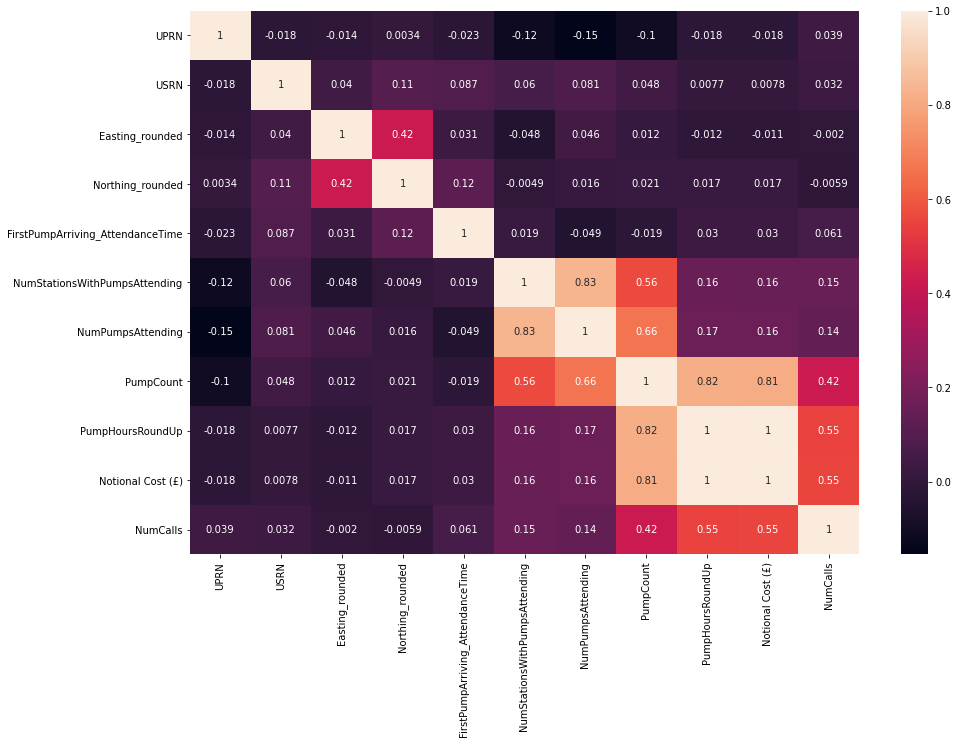

In [71]:
### CHECK CORRELATION
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'),annot = True)
plt.show()

#### Observations:
- There are features that are higgly coorelated we are going to drop them

In [72]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [73]:
df_copy = df.copy() ### maintain a copy for later use

In [74]:
### Encoding the categoric varibales
le = LabelEncoder()
for i in  df_categoric.columns:
    df[i]= le.fit_transform(df[i])

In [75]:
### seperating the features from class labels 
X = df.drop('IncidentGroup',axis=1)
y = df['IncidentGroup']

In [76]:
### scaling or noarmalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [77]:
### train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3
)

### Predictive Machine learning Models

In [78]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    
    
    #y_pred = model.predict(predictors)
    cm = confusion_matrix(target, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm )
    disp.plot(xticks_rotation = "vertical")
    plt.show()
    #labels = np.asarray(
    #    [
    #        ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
    #        for item in cm.flatten()
    #    ]
    #).reshape(2, 2)

    #plt.figure(figsize=(6, 4))
    #plt.show()
    #sns.heatmap(cm, annot=labels, fmt="")
    #plt.ylabel("True label")
    #plt.xlabel("Predicted label")
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="macro")  # to compute Recall
    precision = precision_score(target, pred,average="macro")  # to compute Precision
    f1 = f1_score(target, pred,average="macro")# to compute F1-score
    print(classification_report(target, pred))

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

### KNN Classifier

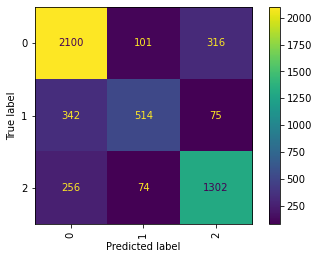

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      2517
           1       0.75      0.55      0.63       931
           2       0.77      0.80      0.78      1632

    accuracy                           0.77      5080
   macro avg       0.76      0.73      0.74      5080
weighted avg       0.77      0.77      0.77      5080



,Accuracy,Recall,Precision,F1
0,0.770866,0.728072,0.764471,0.741032


In [79]:
### Initialize the model  
model1 = KNeighborsClassifier(n_neighbors=7)

# train the model
model1.fit(X_train,y_train)

# check performance on train data
knn_train_perf = model_performance_classification_sklearn(
    model1, X_train, y_train
)  
knn_train_perf


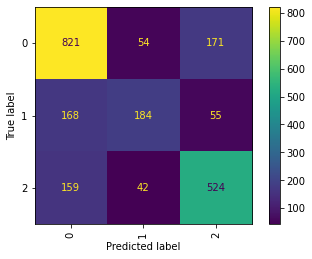

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1046
           1       0.66      0.45      0.54       407
           2       0.70      0.72      0.71       725

    accuracy                           0.70      2178
   macro avg       0.69      0.65      0.66      2178
weighted avg       0.70      0.70      0.70      2178



,Accuracy,Recall,Precision,F1
0,0.70202,0.653247,0.690322,0.664859


In [80]:
# check performance on train data
knn_test_perf = model_performance_classification_sklearn(
    model1, X_test, y_test
)  
knn_test_perf

### Random Forest

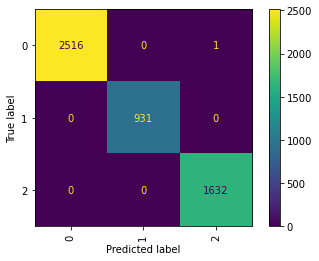

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2517
           1       1.00      1.00      1.00       931
           2       1.00      1.00      1.00      1632

    accuracy                           1.00      5080
   macro avg       1.00      1.00      1.00      5080
weighted avg       1.00      1.00      1.00      5080



,Accuracy,Recall,Precision,F1
0,0.999803,0.999868,0.999796,0.999832


In [81]:
### Initialize the model  
model2 = RandomForestClassifier(random_state=42)

# train the model
model2.fit(X_train,y_train)

# check performance on train data
rf_train_perf = model_performance_classification_sklearn(
    model2, X_train, y_train
)  
rf_train_perf

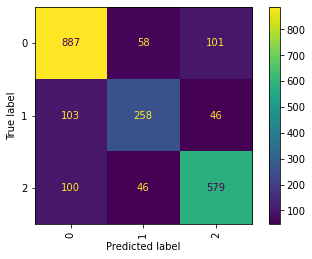

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1046
           1       0.71      0.63      0.67       407
           2       0.80      0.80      0.80       725

    accuracy                           0.79      2178
   macro avg       0.77      0.76      0.77      2178
weighted avg       0.79      0.79      0.79      2178



,Accuracy,Recall,Precision,F1
0,0.791552,0.760173,0.774663,0.766532


In [82]:
# check performance on test data
rf_test_perf = model_performance_classification_sklearn(
    model2, X_test, y_test
)  
rf_test_perf

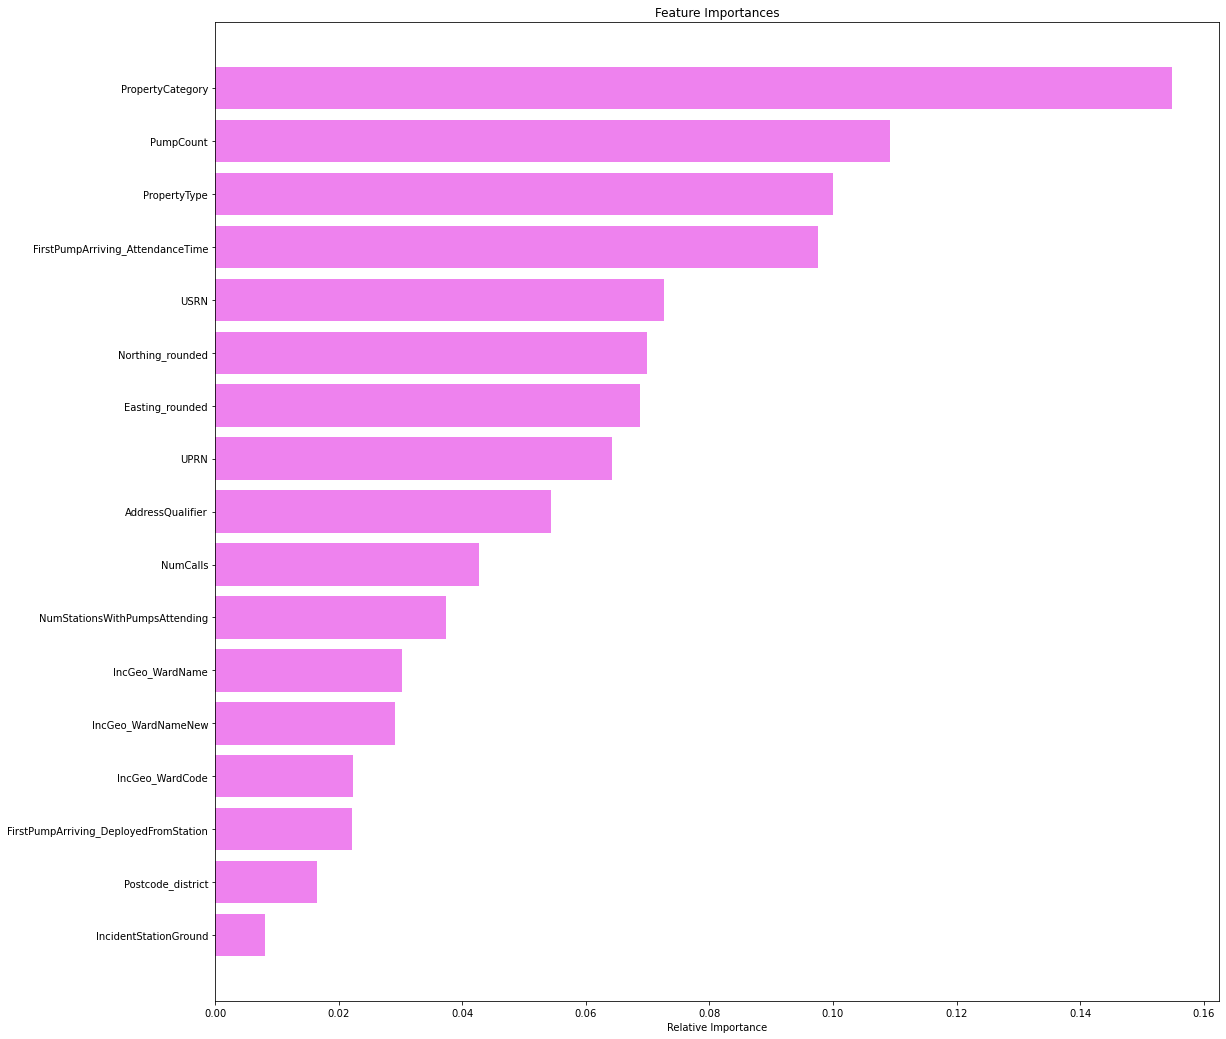

In [83]:
feature_names = X.columns
importances = (
    model2.feature_importances_
)  ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(18, 18))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### MODEL TRAINING PERFORMANCE COMPARISON

In [84]:
# training performance comparison

models_train_comp_df = pd.concat(
    [knn_train_perf.T, rf_train_perf.T], axis=1,
)
models_train_comp_df.columns = [
    "KNN ",
    "Random Forest ",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,KNN,Random Forest
Accuracy,0.770866,0.999803
Recall,0.728072,0.999868
Precision,0.764471,0.999796
F1,0.741032,0.999832


#### MODEL TESTING PERFORMANCE COMPARISON

In [85]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [knn_test_perf.T,rf_test_perf.T], axis=1,
)
models_test_comp_df.columns = [
    "KNN ",
    "Random Forest ",
]
print("testing performance comparison:")
models_test_comp_df

testing performance comparison:


,KNN,Random Forest
Accuracy,0.702020,0.791552
Recall,0.653247,0.760173
Precision,0.690322,0.774663
F1,0.664859,0.766532


### Descriptive Machine Learning Models

We will try to cluster the features and try to find the patterns in the data for the buisness problem.

### K Means Clustering with Elbow Method

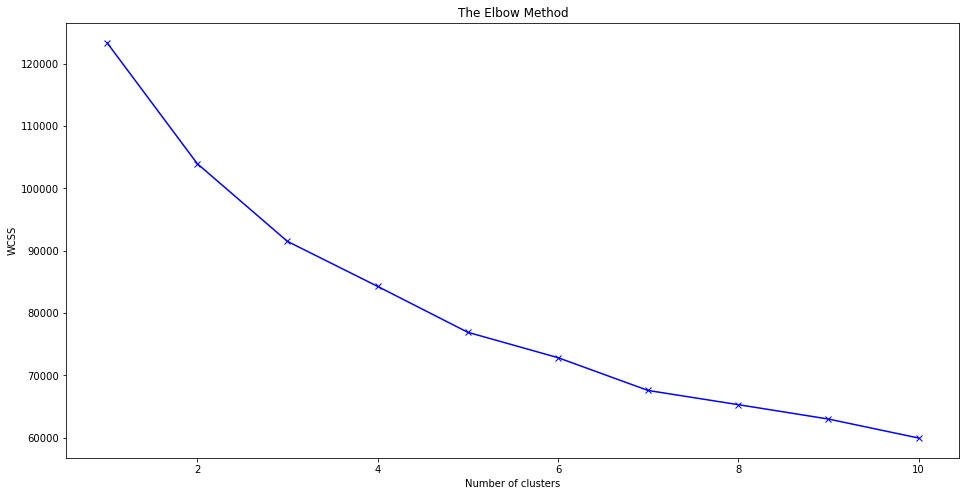

In [86]:
### Elbow methood
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(X_scaled)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Observation:
- We observe the elbow at k =3

In [87]:
### applying the kmeans clustring with the best number of k

In [88]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [89]:
### assigning the clusters values 
df_copy['labels']= kmeans.labels_
df_copy

,UPRN,USRN,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,PumpCount,NumCalls,IncidentGroup,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,IncidentStationGround,FirstPumpArriving_DeployedFromStation,labels
0,0.000000e+00,21201601.0,516650.0,189150.0,369.0,2.0,4.0,5.0,Fire,Non Residential,Private Garden Shed,Correct incident location,HA3,E05013552,Kenton West,Kenton West,Stanmore,Stanmore,2
1,1.001060e+10,21201353.0,514350.0,188350.0,608.0,1.0,1.0,3.0,Fire,Outdoor Structure,Small refuse/rubbish container,In street close to gazetteer location,HA1,E05013550,Headstone,Headstone,Harrow,Northolt,0
2,0.000000e+00,21201528.0,514950.0,191950.0,359.0,1.0,1.0,1.0,False Alarm,Dwelling,Self contained Sheltered Housing,Within same building,HA3,E05013548,Harrow Weald,Harrow Weald,Harrow,Harrow,0
3,1.007027e+10,21201658.0,515950.0,188950.0,341.0,1.0,1.0,1.0,False Alarm,Non Residential,Other retail warehouse,Within same building,HA1,E05013546,Greenhill,Greenhill,Harrow,Harrow,0
4,1.007027e+10,21201658.0,515950.0,188950.0,1064.0,1.0,1.0,1.0,False Alarm,Non Residential,Vehicle sales building,Correct incident location,HA1,E05013546,Greenhill,Greenhill,Harrow,Stanmore,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,0.000000e+00,21202436.0,515450.0,189750.0,412.0,1.0,1.0,1.0,Special Service,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,HA3,E05013562,WEALDSTONE SOUTH,WEALDSTONE SOUTH,Harrow,Harrow,1
7254,0.000000e+00,21200926.0,518450.0,192350.0,431.0,1.0,1.0,1.0,False Alarm,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,HA8,E05013543,CANONS,CANONS,Stanmore,Stanmore,2
7255,0.000000e+00,21201839.0,512550.0,189250.0,132.0,1.0,1.0,1.0,Special Service,Dwelling,House - single occupancy,Correct incident location,HA5,E05013556,PINNER SOUTH,PINNER SOUTH,Harrow,Harrow,1
7256,1.000230e+11,21200986.0,518750.0,189550.0,196.0,2.0,2.0,1.0,False Alarm,Other Residential,Nursing/Care Home/Hospice,Within same building,HA7,E05013551,KENTON EAST,KENTON EAST,Stanmore,Stanmore,2


<AxesSubplot:>

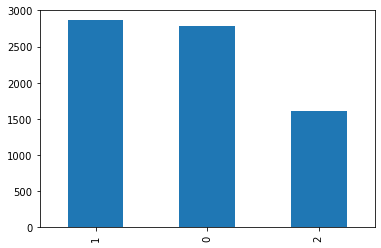

In [90]:
### plotting the labels
df_copy['labels'].value_counts().plot.bar()

labels              0     1     2   All
IncidentGroup                          
All              2785  2862  1611  7258
False Alarm      1468  1359   736  3563
Special Service   884   910   563  2357
Fire              433   593   312  1338
------------------------------------------------------------------------------------------------------------------------


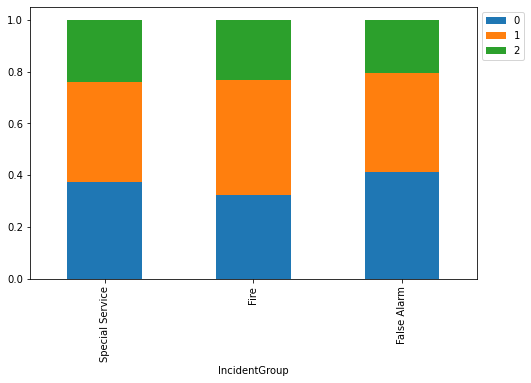

labels                0     1     2   All
PropertyCategory                         
All                2785  2862  1611  7258
Dwelling           1477  1619   879  3975
Non Residential     594   357   196  1147
Road Vehicle        195   254   196   645
Outdoor             237   336   174   747
Other Residential   162   147    99   408
Outdoor Structure   119   142    66   327
Rail Vehicle          1     7     1     9
------------------------------------------------------------------------------------------------------------------------


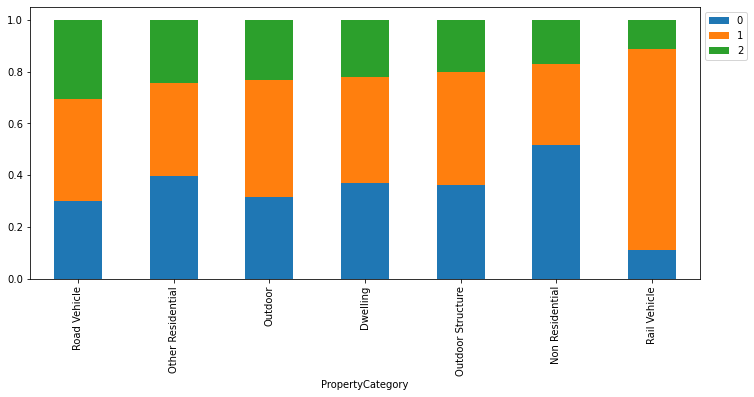

labels                                                 0     1     2   All
PropertyType                                                              
All                                                 2785  2862  1611  7258
House - single occupancy                             411   624   396  1431
Purpose Built Flats/Maisonettes - Up to 3 storeys    324   408   197   929
Car                                                  146   171   148   465
Self contained Sheltered Housing                     207   197   143   547
...                                                  ...   ...   ...   ...
Post office (within other shop/premises)               1     0     0     1
Heathland                                              1     1     0     2
Hospital                                               8     9     0    17
House in Multiple Occupation - 3 or more storey...     0     2     0     2
Nurses'/Doctors' accommodation                         0     3     0     3

[178 rows x 4 columns]
-

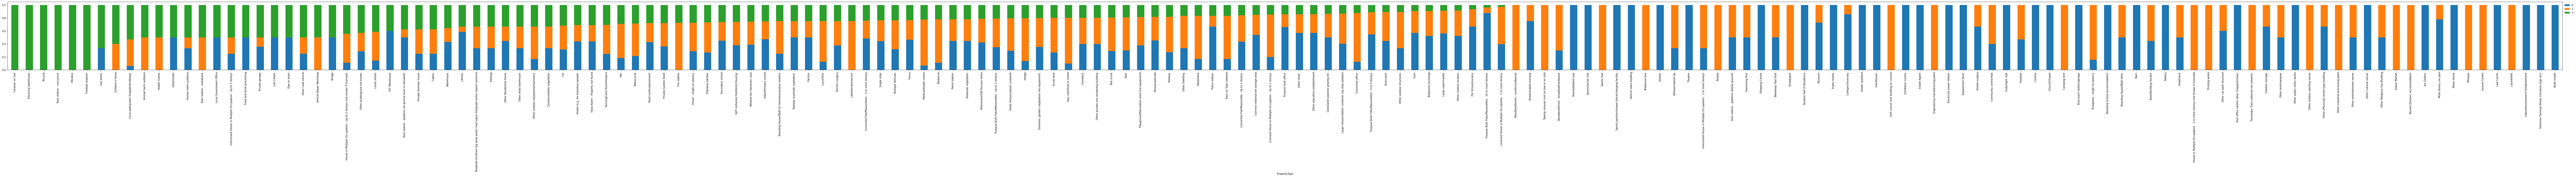

labels                                              0     1     2   All
AddressQualifier                                                       
All                                              2785  2862  1611  7258
Correct incident location                        1558  1582   921  4061
Within same building                              671   554   255  1480
On land associated with building                  232   299   172   703
In street outside gazetteer location              217   236   164   617
In street close to gazetteer location              44    64    57   165
Open land/water - nearest gazetteer location       47    80    32   159
In street remote from gazetteer location            3    10     4    17
Nearby address - street not listed in gazetteer     4     9     4    17
Nearby address - no building in street              6     9     1    16
Railway land or rolling stock                       2    11     1    14
On motorway / elevated road                         1     8     

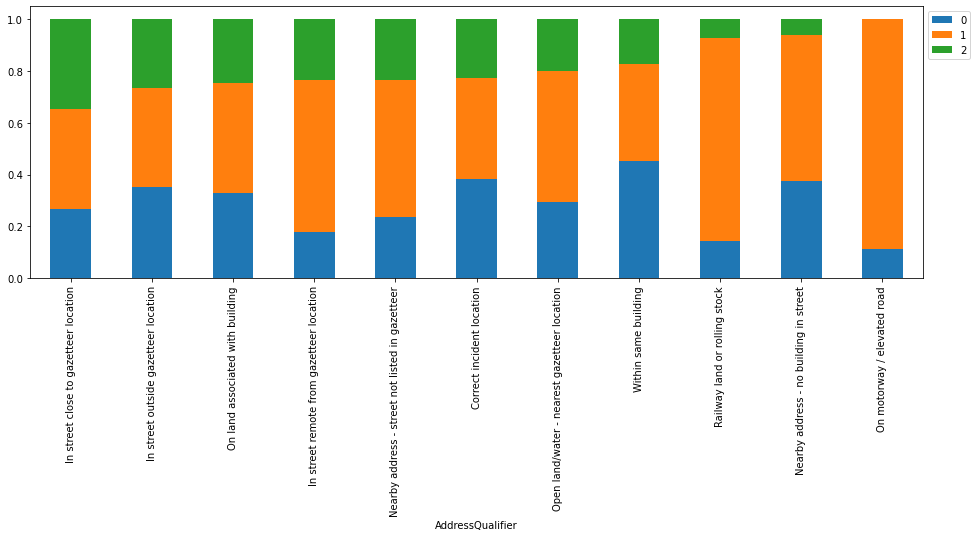

labels                0     1     2   All
Postcode_district                        
All                2785  2862  1611  7258
HA8                   0     0   556   556
HA3                 549   565   555  1669
HA7                   2   552   493  1047
NW9                   0     0     5     5
HA1                1520   115     2  1637
HA2                 507   923     0  1430
HA4                   0    14     0    14
HA5                 207   648     0   855
UB5                   0    35     0    35
WD23                  0     4     0     4
WD6                   0     6     0     6
------------------------------------------------------------------------------------------------------------------------


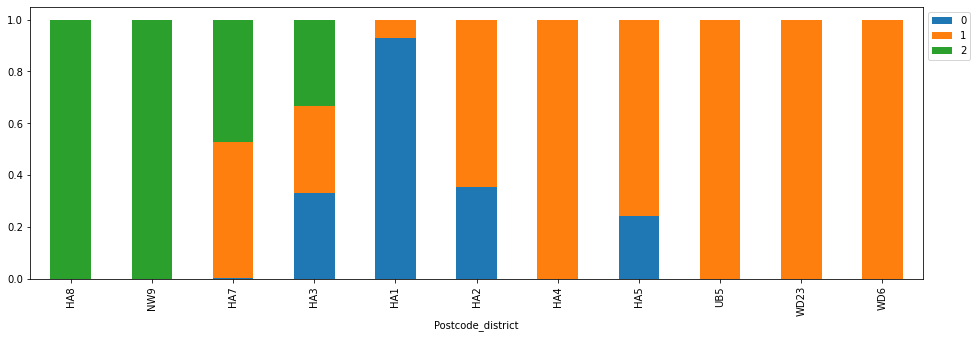

labels              0     1     2   All
IncGeo_WardCode                        
All              2785  2862  1611  7258
E05013545           0     0   370   370
E05013551           2     0   288   290
E05013543           0     0   251   251
E05013544           1     0   226   227
E05013542           0     0   206   206
E05013552          16     0   154   170
E05013548         459     0   108   567
E05013637           0     0     4     4
E05013547         445     0     2   447
E05013630           0     0     1     1
E05013508           0     0     1     1
E05013553         295     0     0   295
E05013550         315     0     0   315
E05013555           2   353     0   355
E05013556           1   334     0   335
E05013557           0   126     0   126
E05013558           0   315     0   315
E05013559           0   390     0   390
E05013560           0   562     0   562
E05013561           0   302     0   302
E05013562           0   263     0   263
E05013563           0   215     0   215


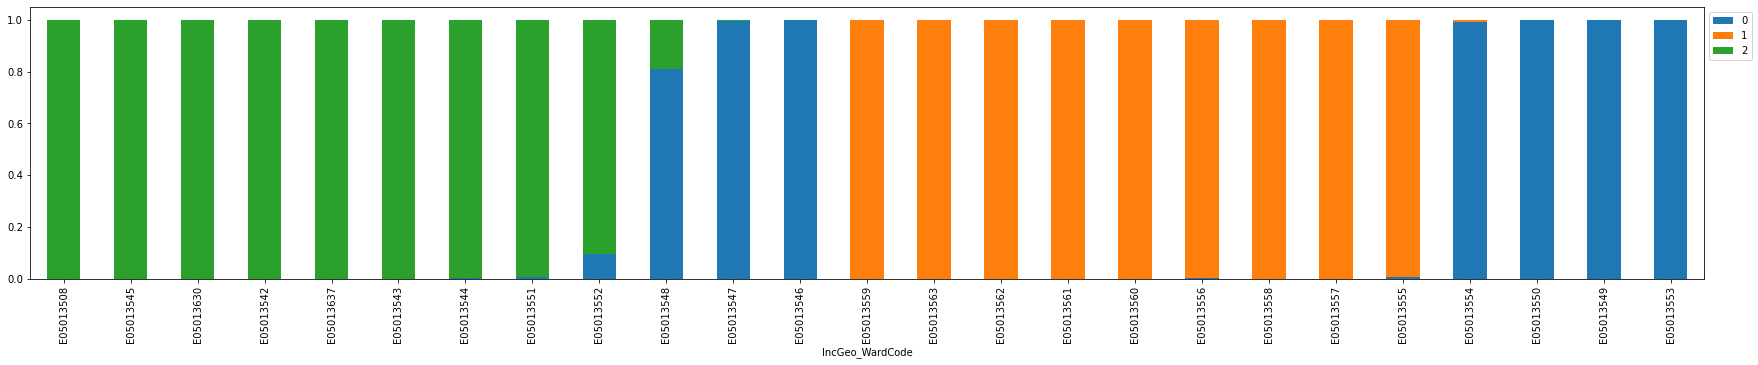

labels                 0     1     2   All
IncGeo_WardName                           
All                 2785  2862  1611  7258
Edgware                0     0   329   329
Kenton East            1     0   233   234
Canons                 0     0   200   200
Centenary              1     0   190   191
Belmont                0     0   173   173
Kenton West           11     0   132   143
Harrow Weald         394     0    99   493
KENTON EAST            1     0    55    56
CANONS                 0     0    51    51
EDGWARE                0     0    45    45
CENTENARY              0     0    36    36
BELMONT                0     0    33    33
KENTON WEST            5     0    22    27
HARROW WEALD          65     0     9    74
Harrow on the Hill   374     0     2   376
Queensbury             0     0     1     1
Burnt Oak              0     0     1     1
Stanmore               0   465     0   465
ROXETH                 0    68     0    68
Rayners Lane           0   112     0   112
Roxbourne  

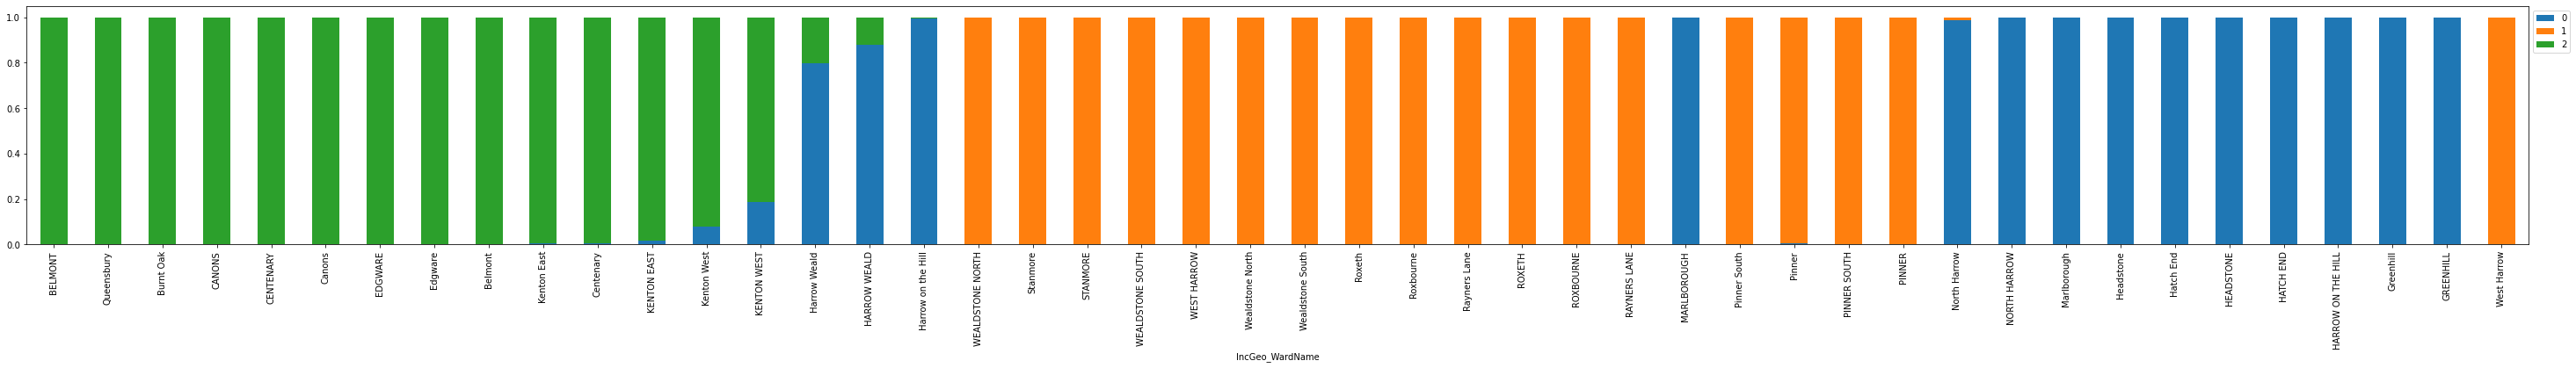

labels                 0     1     2   All
IncGeo_WardNameNew                        
All                 2785  2862  1611  7258
Edgware                0     0   329   329
Kenton East            1     0   233   234
Canons                 0     0   200   200
Centenary              1     0   190   191
Belmont                0     0   173   173
Kenton West           11     0   132   143
Harrow Weald         394     0    99   493
KENTON EAST            1     0    55    56
CANONS                 0     0    51    51
EDGWARE                0     0    45    45
CENTENARY              0     0    36    36
BELMONT                0     0    33    33
KENTON WEST            5     0    22    27
HARROW WEALD          65     0     9    74
Harrow on the Hill   374     0     2   376
Queensbury             0     0     1     1
Burnt Oak              0     0     1     1
Stanmore               0   465     0   465
ROXETH                 0    68     0    68
Rayners Lane           0   112     0   112
Roxbourne  

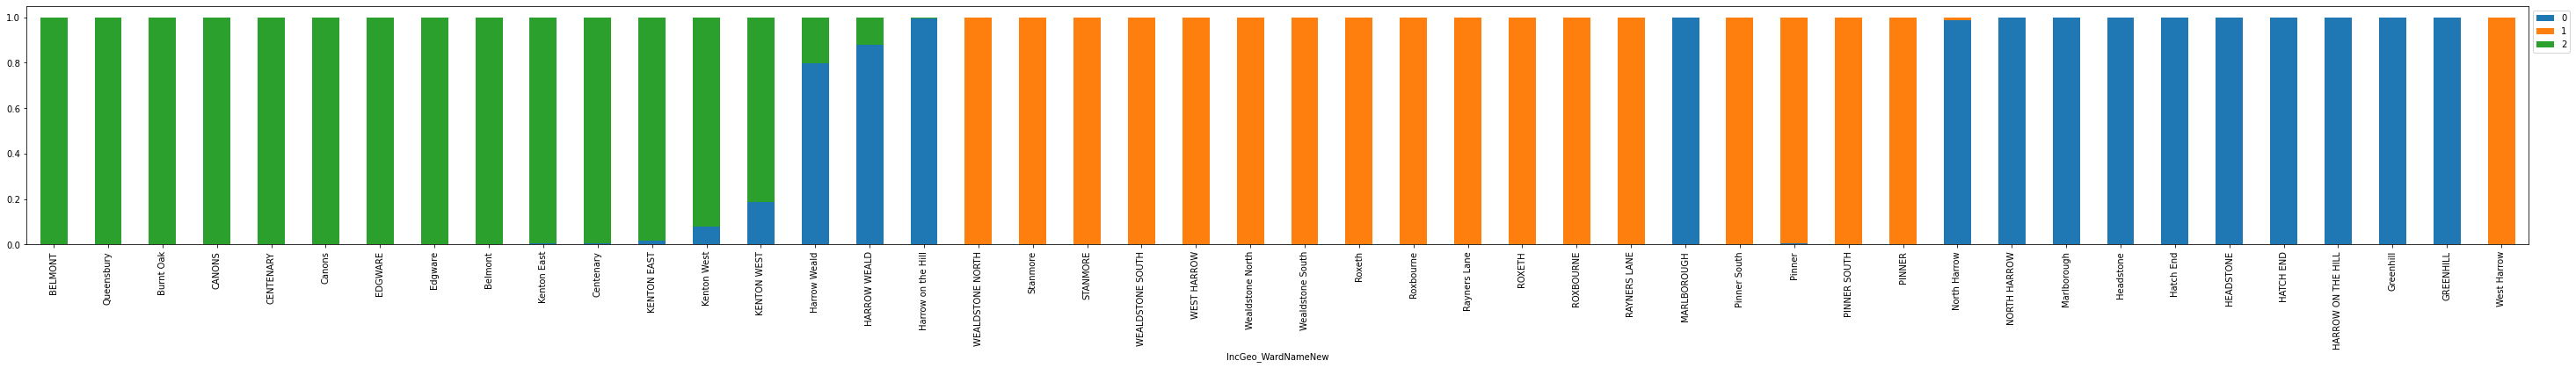

labels                    0     1     2   All
IncidentStationGround                        
All                    2785  2862  1611  7258
Stanmore                 49   867  1606  2522
Harrow                 2357  1062     3  3422
Wembley                   0     0     2     2
Northolt                379   933     0  1312
------------------------------------------------------------------------------------------------------------------------


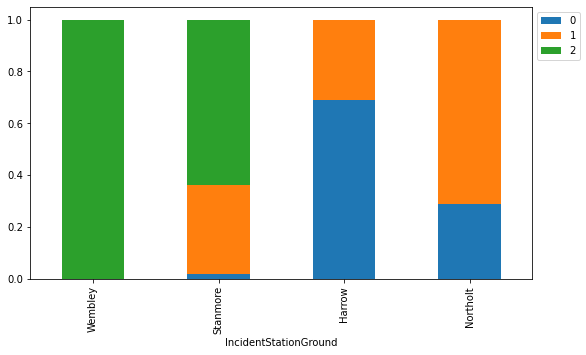

labels                                    0     1     2   All
FirstPumpArriving_DeployedFromStation                        
All                                    2785  2862  1611  7258
Stanmore                                256   712  1438  2406
Mill Hill                                 3    34    62    99
NA                                      124    84    42   250
Harrow                                 1756  1064    24  2844
Hendon                                    3     8    20    31
Wembley                                 113    29    18   160
Northolt                                502   869     3  1374
Barnet                                    0     0     2     2
West Hampstead                            0     0     1     1
Willesden                                 0     0     1     1
North Kensington                          1     0     0     1
Ealing                                    1     0     0     1
Park Royal                                1     1     0     2
Ruislip 

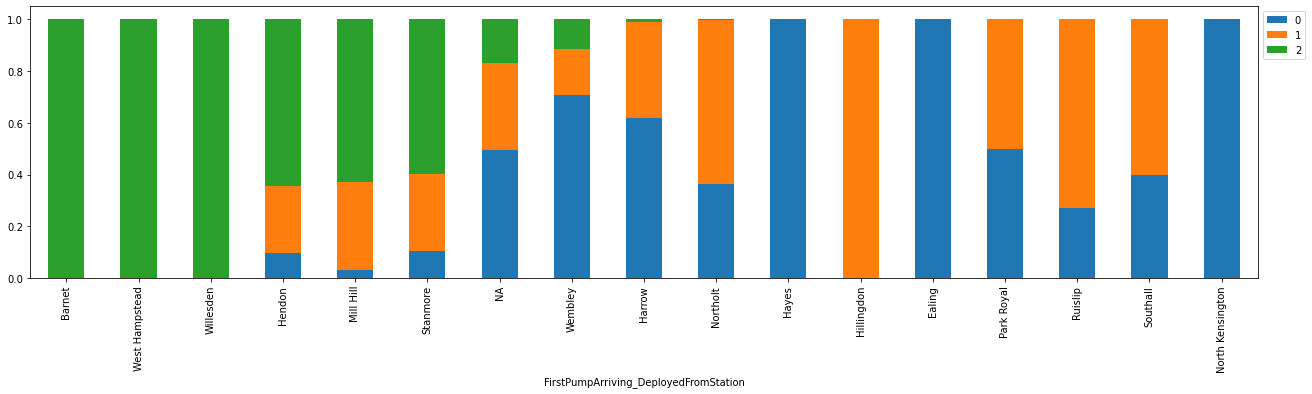

In [91]:
# Analyzing the categoric features
c_c = df_copy.select_dtypes('object').columns
for i in c_c :
    stacked_barplot(df_copy, i, "labels")

### DBSCAN

In [121]:
dbscan = DBSCAN(eps=2, min_samples=10).fit(X_scaled)
### assigning the clusters values 
df_copy['labels'] = dbscan.labels_

<AxesSubplot:>

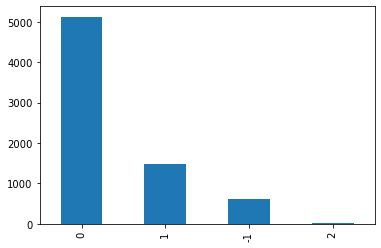

In [122]:
### plotting the labels
df_copy['labels'].value_counts().plot.bar()

labels            -1     0     1   2   All
IncidentGroup                             
All              626  5128  1481  23  7258
False Alarm      229  2638   684  12  3563
Special Service  155  1665   530   7  2357
Fire             242   825   267   4  1338
------------------------------------------------------------------------------------------------------------------------


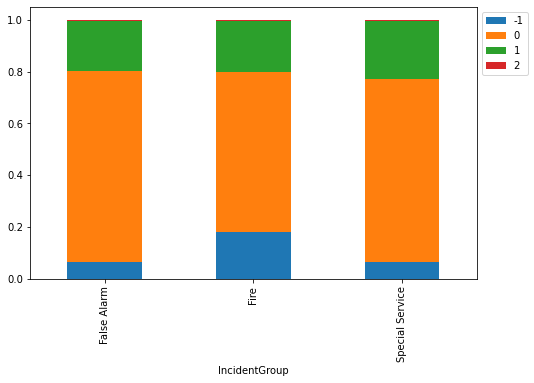

labels              -1     0     1   2   All
PropertyCategory                            
All                626  5128  1481  23  7258
Dwelling           172  2917   864  22  3975
Non Residential     80   892   174   1  1147
Other Residential   55   275    78   0   408
Outdoor            105   485   157   0   747
Outdoor Structure   57   212    58   0   327
Rail Vehicle         5     4     0   0     9
Road Vehicle       152   343   150   0   645
------------------------------------------------------------------------------------------------------------------------


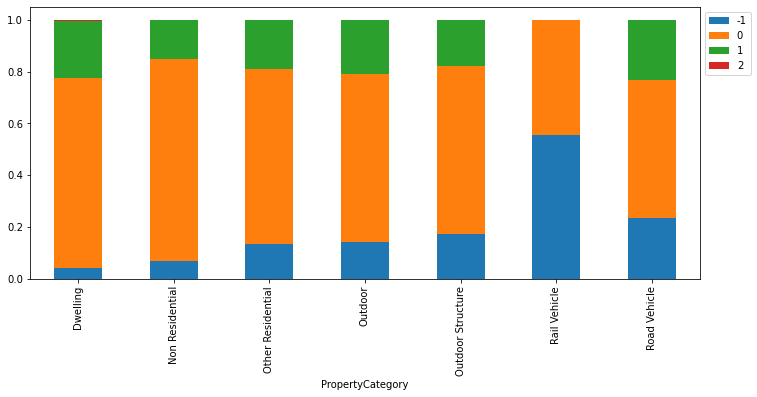

labels                                               -1     0     1   2   All
PropertyType                                                                 
All                                                 626  5128  1481  23  7258
House - single occupancy                             51   972   398  10  1431
Licensed House in Multiple Occupation - Up to 2...    1    28     7   4    40
Purpose Built Flats/Maisonettes - Up to 3 storeys    32   697   197   3   929
Licensed House in Multiple Occupation - 3 or mo...    1    28     1   3    33
...                                                 ...   ...   ...  ..   ...
House in Multiple Occupation - 3 or more storey...    0     2     0   0     2
House in Multiple Occupation - Up to 2 storeys ...    0     5     4   0     9
Human harm outdoors                                   1     2     3   0     6
Indoor Market                                         0     1     0   0     1
Nurses'/Doctors' accommodation                        0     3   

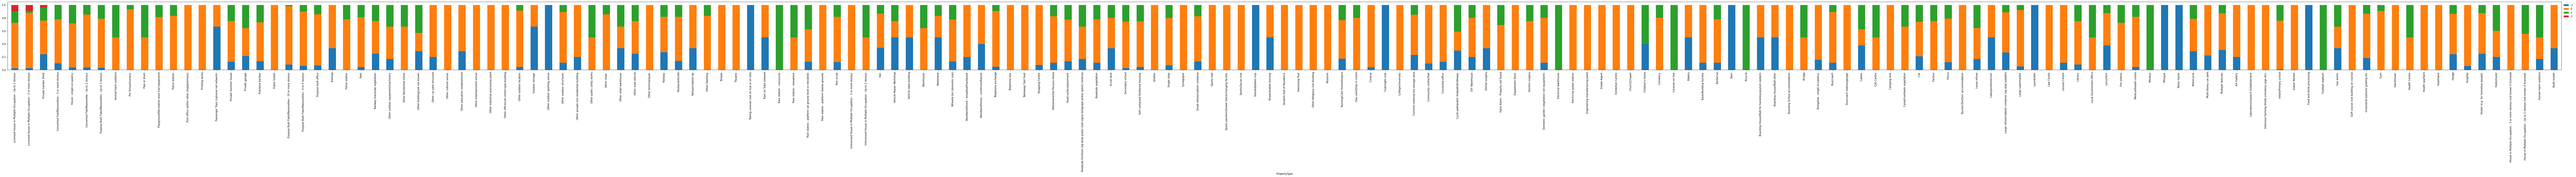

labels                                            -1     0     1   2   All
AddressQualifier                                                          
Correct incident location                        176  2959   903  23  4061
All                                              626  5128  1481  23  7258
In street close to gazetteer location             45    81    39   0   165
In street outside gazetteer location             110   372   135   0   617
In street remote from gazetteer location           2    12     3   0    17
Nearby address - no building in street             1    14     1   0    16
Nearby address - street not listed in gazetteer    3    10     4   0    17
On land associated with building                 115   436   152   0   703
On motorway / elevated road                        8     1     0   0     9
Open land/water - nearest gazetteer location      26   106    27   0   159
Railway land or rolling stock                      7     7     0   0    14
Within same building     

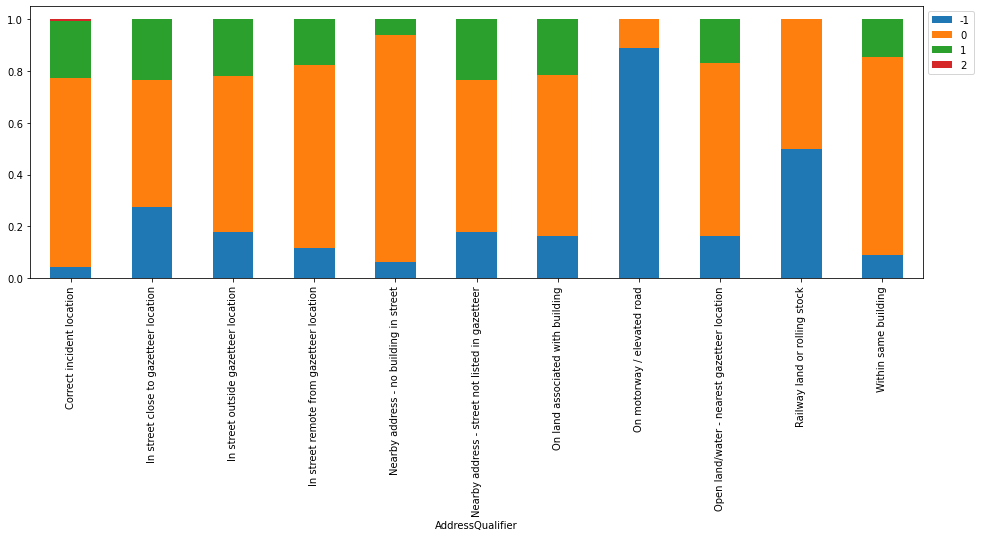

labels              -1     0     1   2   All
Postcode_district                           
UB5                 12     0     0  23    35
All                626  5128  1481  23  7258
HA1                 89  1548     0   0  1637
HA2                 80  1350     0   0  1430
HA3                204   942   523   0  1669
HA4                  3    11     0   0    14
HA5                 71   784     0   0   855
HA7                104   493   450   0  1047
HA8                 53     0   503   0   556
NW9                  0     0     5   0     5
WD23                 4     0     0   0     4
WD6                  6     0     0   0     6
------------------------------------------------------------------------------------------------------------------------


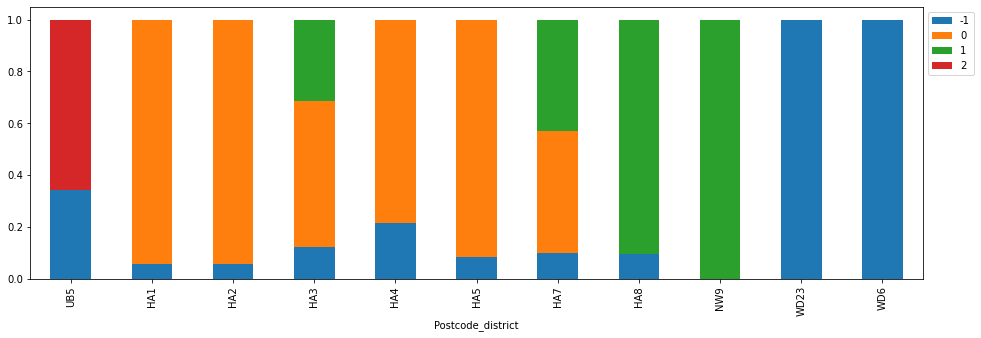

labels            -1     0     1   2   All
IncGeo_WardCode                           
All              626  5128  1481  23  7258
E05013559         34   333     0  23   390
E05013542         18     0   188   0   206
E05013637          4     0     0   0     4
E05013630          1     0     0   0     1
E05013563         20   195     0   0   215
E05013562         48   215     0   0   263
E05013561         31   271     0   0   302
E05013560         69   493     0   0   562
E05013558         12   303     0   0   315
E05013557          7   119     0   0   126
E05013556         19   316     0   0   335
E05013555         27   328     0   0   355
E05013508          1     0     0   0     1
E05013553         21   274     0   0   295
E05013552         22     0   148   0   170
E05013551         31     0   259   0   290
E05013550         14   301     0   0   315
E05013549         29   217     0   0   246
E05013548         74   390   103   0   567
E05013547         25   422     0   0   447
E05013546  

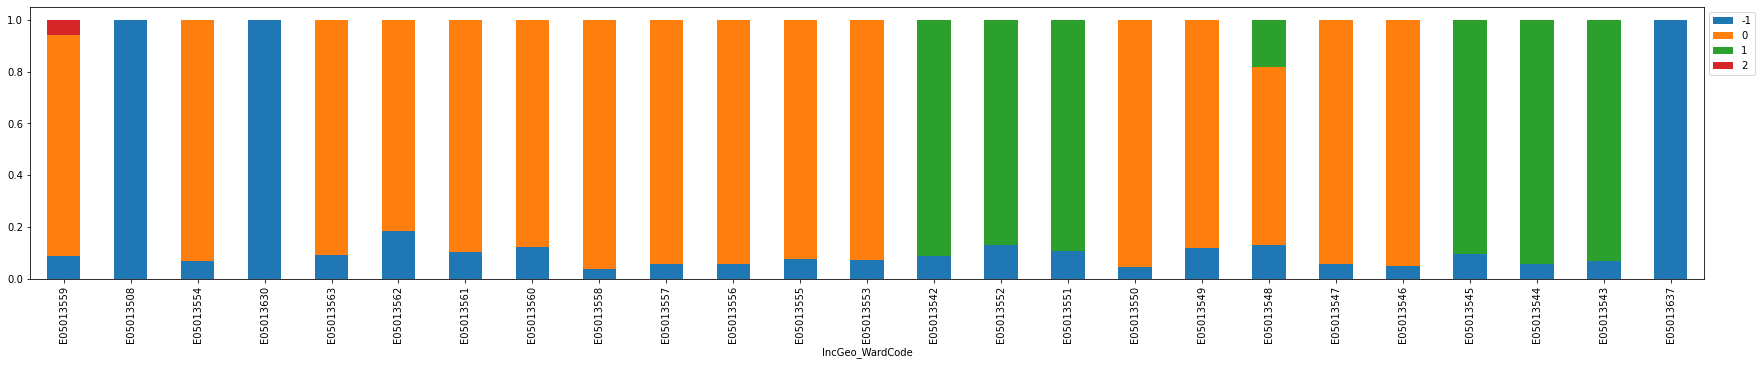

labels               -1     0     1   2   All
IncGeo_WardName                              
All                 626  5128  1481  23  7258
Roxeth               28   279     0  15   322
ROXETH                6    54     0   8    68
Rayners Lane          7   105     0   0   112
North Harrow         10   154     0   0   164
PINNER                4    43     0   0    47
PINNER SOUTH          1    43     0   0    44
Pinner               23   285     0   0   308
Pinner South         18   273     0   0   291
Queensbury            1     0     0   0     1
RAYNERS LANE          0    14     0   0    14
ROXBOURNE             2    34     0   0    36
Roxbourne            10   269     0   0   279
Marlborough          18   217     0   0   235
STANMORE             16    81     0   0    97
Stanmore             53   412     0   0   465
WEALDSTONE NORTH      4    47     0   0    51
WEALDSTONE SOUTH      6    40     0   0    46
WEST HARROW           6    35     0   0    41
Wealdstone North     27   224     

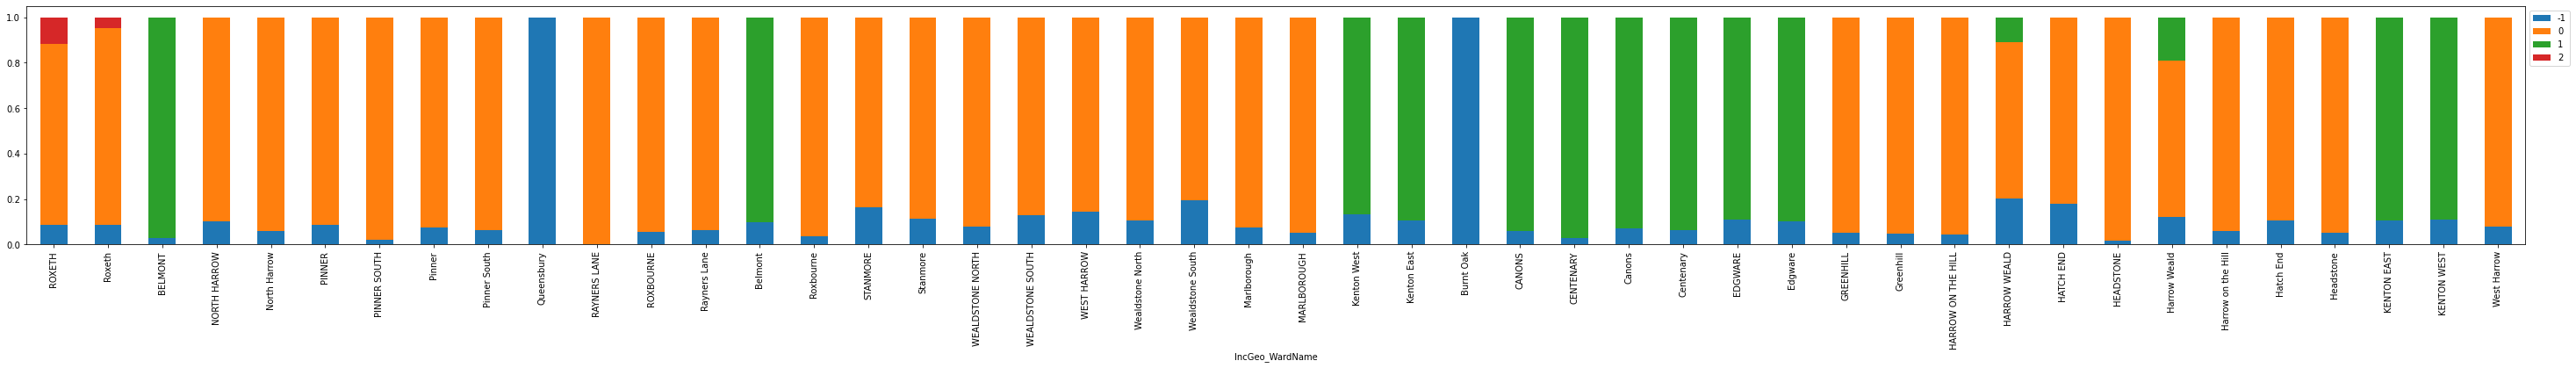

labels               -1     0     1   2   All
IncGeo_WardNameNew                           
All                 626  5128  1481  23  7258
Roxeth               28   279     0  15   322
ROXETH                6    54     0   8    68
Rayners Lane          7   105     0   0   112
North Harrow         10   154     0   0   164
PINNER                4    43     0   0    47
PINNER SOUTH          1    43     0   0    44
Pinner               23   285     0   0   308
Pinner South         18   273     0   0   291
Queensbury            1     0     0   0     1
RAYNERS LANE          0    14     0   0    14
ROXBOURNE             2    34     0   0    36
Roxbourne            10   269     0   0   279
Marlborough          18   217     0   0   235
STANMORE             16    81     0   0    97
Stanmore             53   412     0   0   465
WEALDSTONE NORTH      4    47     0   0    51
WEALDSTONE SOUTH      6    40     0   0    46
WEST HARROW           6    35     0   0    41
Wealdstone North     27   224     

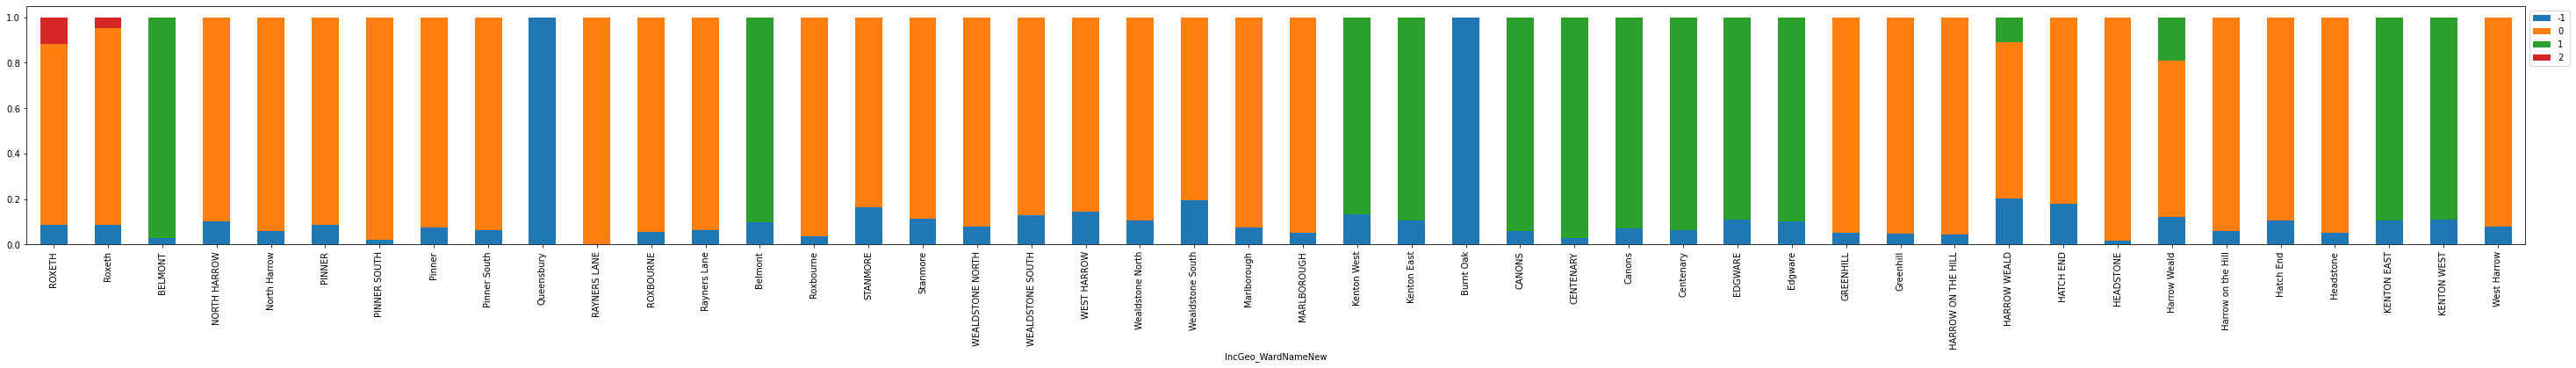

labels                  -1     0     1   2   All
IncidentStationGround                           
Northolt                87  1202     0  23  1312
All                    626  5128  1481  23  7258
Harrow                 256  3166     0   0  3422
Stanmore               281   760  1481   0  2522
Wembley                  2     0     0   0     2
------------------------------------------------------------------------------------------------------------------------


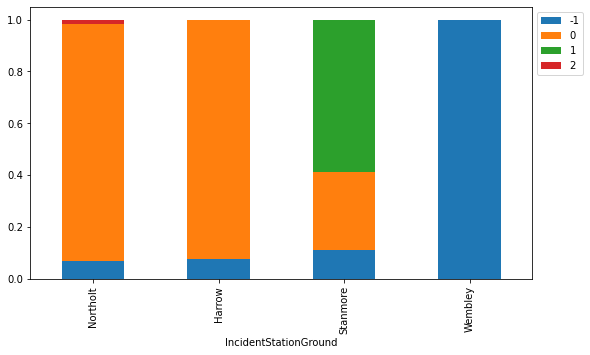

labels                                  -1     0     1   2   All
FirstPumpArriving_DeployedFromStation                           
All                                    626  5128  1481  23  7258
Northolt                                94  1258     0  22  1374
NA                                       7   201    41   1   250
Harrow                                 178  2633    33   0  2844
Hayes                                    1     0     0   0     1
Hendon                                  13     4    14   0    31
Hillingdon                               1     0     0   0     1
Mill Hill                               34    22    43   0    99
North Kensington                         1     0     0   0     1
Ealing                                   1     0     0   0     1
Park Royal                               1     1     0   0     2
Ruislip                                 19    55     0   0    74
Southall                                 5     5     0   0    10
Stanmore                 

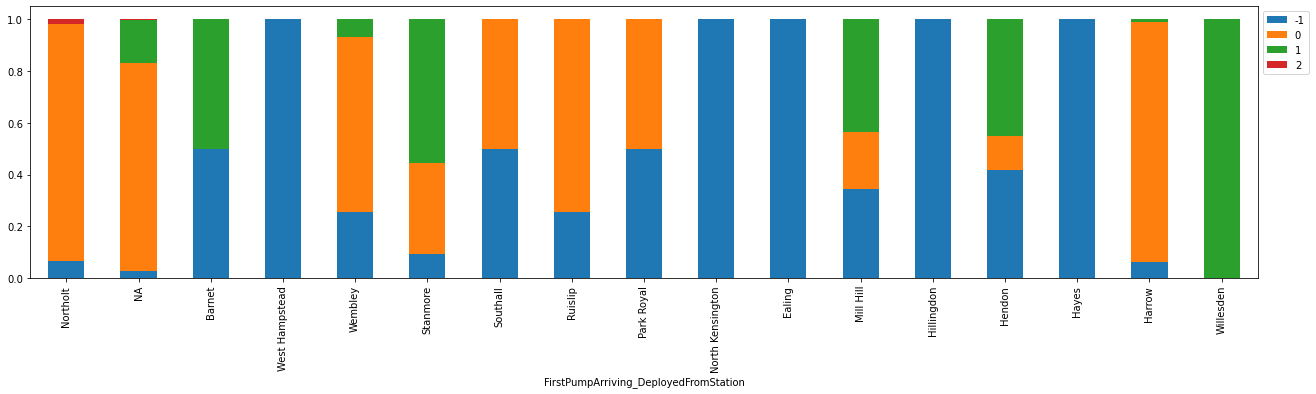

In [123]:
# Analyzing the categoric features
c_c = df_copy.select_dtypes('object').columns
for i in c_c :
    stacked_barplot(df_copy, i, "labels")